# **Document Embedding with BERT**

The goal of this project is to embedd documents using BERT and cluster the embeddings. We try different BERT layer to get different results. The dataset consist of news articles and associated categories. To evaluate the embeddings, several cluster metrics and the cosine similarity are measured.

# **Preprocessing Steps**

This section outlines the steps that occur prior to the generation of embeddings. These steps are necessary to ensure the successful generation of the embeddings.

## **Install Required Packages**


In [ ]:
#Install the 'transformers' library from Hugging Face
!pip install transformers

In [ ]:
# Install the 'accelerate' package to speed up and optimize model training and inference in PyTorch.
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 5.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

##**Import Statements**

In [ ]:
#Imports the pandas library for data manipulation and analysis
import pandas as pd
#Library for numerical computations
import numpy as np
#Import the PyTorch library, which is used for tensor computations and deep learning
import torch
#Initializes a WordNetLemmatizer for reducing words to their base forms
from nltk.stem import WordNetLemmatizer
#Initializes a PorterStemmer which reduces words to their root forms
from nltk.stem import PorterStemmer
#Imports the Natural Language Toolkit (NLTK) for text processing
import nltk
#Imports a list of stopwords for text processing
from nltk.corpus import stopwords
#Imports the regular expression module for string pattern matching.
import re
#Imports a module for vreating dictionaries with default values
from collections import defaultdict
#Imports the time function for time related operations
from time import time
#Imports the metrics module from scikit-learn library for evaluating machine learning models
from sklearn import metrics
#Import the BERT model and tokenizer from the Hugging Face Transformers library
from transformers import BertModel, BertTokenizer
#Imports TSNE class for dimensionality reduction
from sklearn.manifold import TSNE
#from collections import OrderedDict
#Imports the pyplot module for creating visualizations
import matplotlib.pyplot as plt
#Imports the seaborn library for statistical data visualization
import seaborn as sns
#Imports KMeans class for K-means clustering
from sklearn.cluster import KMeans
#Imports the cosine_similarity for computing cosine similarity between pairs of samples
from sklearn.metrics.pairwise import cosine_similarity
#Imports Counter class for counting hashable objects
from collections import Counter
#Imports silhouette_samples and silhouette_score for measuring the quality of clustering
from sklearn.metrics import silhouette_samples, silhouette_score
#Imports the cm module for handling colormaps
import matplotlib.cm as cm
#Imports the drive module for accessing Google Drive files in Google Colab environment.
from google.colab import drive
# Import the LabelEncoder class to convert categorical variables into numeric values
from sklearn.preprocessing import LabelEncoder
#Imports SVD class for dimensionality reduction
from sklearn.decomposition import TruncatedSVD
#Imports PCA class for dimensionality reduction
from sklearn.decomposition import PCA

## **Download Statements**

In [ ]:
#Downloads the WordNet dataset for the NLTK library for using certain features like lemmatization
nltk.download('wordnet')
#Downloads the stopwords dataset for the NLTK library, which contains common words
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Data Preprocessing**

### Dataset One

The dataset consists of 252 different news articles and eight categories. The dataset is stored in the path variable.

In [ ]:
#Mounts the Google Drive at ("/content/drive") in the Google Colab enviornment
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Implementation/Dataset/NewsTwo.csv"

Mounted at /content/drive


In [ ]:
#Read a CSV file into a pandas DataFrame object using the latin1 encoding
news_df = pd.read_csv(path,encoding='latin1')

Preprocessing consists of several steps. First, the data is converted into lowercase and stored in a new DataFrame object.Then the functions for lemmatization, stemming, removal of stop words and removal of special characters are implemented

In [ ]:
#Save the original 'News' column for comparison later
news_df['Original_News'] = news_df['News']
news_df['Preprocessed_News'] = news_df['News']

#Convert to lowercase
news_df['Preprocessed_News'] = news_df['Preprocessed_News'].str.lower()

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))

#Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable. In this case, it is better to not use these features

In [ ]:
#Text pre-processing function
def preprocess_text(text):
    #text = remove_special_characters(text)
    #text = remove_stopwords(text)
    #text = lemmatize_text(text) #You can choose whether to apply lemmatization
    #text = stem_text(text)  #You can choose whether to apply stemming
    return text

Now the preprocessing steps are applied to the dataset

In [ ]:
#Apply preprocessing to the documents
news_df['Preprocessed_News'] = news_df['Preprocessed_News'].apply(preprocess_text)

#Check for missing values ​​and handle them
if news_df.isnull().values.any():
    news_df.dropna(inplace=True)

#Extract the text data and associated categories from the filtered DataFrame
text_data = news_df['Preprocessed_News']
labels = news_df['Category']
print(f"{len(text_data)} documents ")

#Calculate unique labels and their counts and store the number of categories in "true_k"
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

#Display the total number of documents an categories
print(f"{len(news_df)} documents - {true_k} categories")

252 documents 
252 documents - 8 categories


Compare the news article before and after preprocessing

In [ ]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df = news_df[['Original_News', 'Preprocessed_News']]
comparison_df.head(10)

Original_News  \
0  The IMF now expects China's economy to grow by...   
1  Manufacturing activity in the Eurozone has dec...   
2  Continued disruptions in the global supply cha...   
3  Concerns about food security remain high due t...   
4  While some central banks, like the US Federal ...   
5  Bangladeshi workers abroad continue to send st...   
6  The Centre for Economics and Business Research...   
7  Bangladesh has maintained macroeconomic stabil...   
8  Government investments in infrastructure proje...   
9  he US unemployment rate has dropped to 3.5%, i...   

                                   Preprocessed_News  
0  the imf now expects china's economy to grow by...  
1  manufacturing activity in the eurozone has dec...  
2  continued disruptions in the global supply cha...  
3  concerns about food security remain high due t...  
4  while some central banks, like the us federal ...  
5  bangladeshi workers abroad continue to send st...  
6  the centre for economics and business research...  
7  bangladesh has maintained macroeconomic stabil...  
8  government investments in infrastructure proje...  
9  he us unemployment rate has dropped to 3.5%, i...

### Dataset Two

The dataset consists of 50000 different news articles and ten categories.

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the CSV file
df_two = pd.read_csv("/content/drive/MyDrive/Implementation/Dataset/NewsCategorizer.csv")

news_two_df = df_two.drop(['headline','links','keywords'], axis = 1)

Preprocessing consists of several steps. First, the data is converted into lowercase and stored in a new DataFrame object.Then the functions for lemmatization, stemming, removal of stop words and removal of special characters are implemented

In [ ]:
#Convert to lowercase
news_two_df['short_description'] = news_two_df['short_description'].str.lower()

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))

#Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable. In this case, it is better to not use these features

In [ ]:
#Text pre-processing function
def preprocess_text(text):
    #text = remove_special_characters(text)
    #text = remove_stopwords(text)
    #text = lemmatize_text(text) #You can choose whether to apply lemmatization
    #text = stem_text(text)  #You can choose whether to apply stemming
    return text

Now the preprocessing steps are applied to the dataset

In [ ]:
#Apply preprocessing to the documents
news_two_df['short_description'] = news_two_df['short_description'].apply(preprocess_text)

#Check for missing values ​​and handle them
if news_two_df.isnull().values.any():
    news_two_df.dropna(inplace=True)

#Extract the text data and associated categories from the filtered DataFrame
text_data_two = news_two_df['short_description']
labels_two = news_two_df['category']
print(f"{len(text_data_two)} documents ")

#Calculate unique labels and their counts and store the number of categories in "true_k"
unique_labels_two, category_sizes_two = np.unique(labels_two, return_counts=True)
true_k_two = unique_labels_two.shape[0]

#Display the total number of documents an categories
print(f"{len(news_two_df)} documents - {true_k_two} categories")

50000 documents 
50000 documents - 10 categories


Compare the news article before and after preprocessing

In [ ]:
#Save the original 'News' column for comparison later
news_two_df['Original_News'] = df_two['short_description']
news_two_df['Preprocessed_News'] = news_two_df['short_description']
news_two_df['News'] = news_two_df['short_description']

In [ ]:
news_two_df['Category'] = news_two_df['category']

In [ ]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df_two = news_two_df[['Original_News', 'Preprocessed_News']]
comparison_df_two.head(10)

Original_News  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   
5  By Carey Moss for YouBeauty.com Love rom-coms,...   
6  The nation in general scored a 66.2 in 2011 on...   
7  It's also worth remembering that if the water ...   
8  If you look at our culture's eating behavior, ...   
9  François-Marie Arouet, 18th century French aut...   

                                   Preprocessed_News  
0  resting is part of training. i've confirmed wh...  
1  think of talking to yourself as a tool to coac...  
2  the clock is ticking for the united states to ...  
3  if you want to be busy, keep trying to be perf...  
4  first, the bad news: soda bread, corned beef a...  
5  by carey moss for youbeauty.com love rom-coms,...  
6  the nation in general scored a 66.2 in 2011 on...  
7  it's also worth remembering that if the water ...  
8  if you look at our culture's eating behavior, ...  
9  françois-marie arouet, 18th century french aut...

### Dataset Three

The dataset consists of around 100000 different news articles and eight categories.

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the CSV file
df_three = pd.read_csv("/content/drive/MyDrive/Implementation/Dataset/NewNews.csv",delimiter=";")

news_three_df = df_three.drop(['link','domain','published_date','lang'], axis = 1)

Preprocessing consists of several steps. First, the data is converted into lowercase and stored in a new DataFrame object.Then the functions for lemmatization, stemming, removal of stop words and removal of special characters are implemented

In [ ]:
#Convert to lowercase
news_three_df['title'] = news_three_df['title'].str.lower()

#news_three_df = news_three_df.groupby('topic').apply(lambda x: x.sample(min(len(x), 1000))).reset_index(drop=True)

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))

#Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable. In this case, it is better to not use these features

In [ ]:
#Text pre-processing function
def preprocess_text(text):
    #text = remove_special_characters(text)
    #text = remove_stopwords(text)
    #text = lemmatize_text(text) #You can choose whether to apply lemmatization
    #text = stem_text(text)  #You can choose whether to apply stemming
    return text

Now the preprocessing steps are applied to the dataset

In [ ]:
#Apply preprocessing to the documents
news_three_df['title'] = news_three_df['title'].apply(preprocess_text)

#Check for missing values ​​and handle them
if news_three_df.isnull().values.any():
    news_three_df.dropna(inplace=True)

#Extract the text data and associated categories from the filtered DataFrame
text_data_three = news_three_df['title']
labels_three = news_three_df['topic']
print(f"{len(text_data_three)} documents ")

#Calculate unique labels and their counts and store the number of categories in "true_k"
unique_labels_three, category_sizes_three = np.unique(labels_three, return_counts=True)
true_k_three = unique_labels_three.shape[0]

#Display the total number of documents an categories
print(f"{len(news_three_df)} documents - {true_k_three} categories")

108774 documents 
108774 documents - 8 categories


Compare the news article before and after preprocessing

In [ ]:
#Save the original 'News' column for comparison later
news_three_df['Original_News'] = df_three['title']
news_three_df['Preprocessed_News'] = news_three_df['title']
news_three_df['News'] = news_three_df['title']

In [ ]:
news_three_df['Category'] = news_three_df['topic']

In [ ]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df_three = news_three_df[['Original_News', 'Preprocessed_News']]
comparison_df_three.head(10)

Original_News  \
0  A closer look at water-splitting's solar fuel ...   
1  An irresistible scent makes locusts swarm stud...   
2  Artificial intelligence warning: AI will know ...   
3   Glaciers Could Have Sculpted Mars Valleys: Study   
4  Perseid meteor shower 2020: What time and how ...   
5  NASA Releases In-Depth Map of Beirut Explosion...   
6  SpaceX, NASA Demo-2 Rocket Launch Set for Satu...   
7      Orbital space tourism set for rebirth in 2021   
8  Greenland's melting ice sheet has 'passed the ...   
9  NASA invites engineering students to help harv...   

                                   Preprocessed_News  
0  a closer look at water-splitting's solar fuel ...  
1  an irresistible scent makes locusts swarm stud...  
2  artificial intelligence warning: ai will know ...  
3   glaciers could have sculpted mars valleys: study  
4  perseid meteor shower 2020: what time and how ...  
5  nasa releases in-depth map of beirut explosion...  
6  spacex, nasa demo-2 rocket launch set for satu...  
7      orbital space tourism set for rebirth in 2021  
8  greenland's melting ice sheet has 'passed the ...  
9  nasa invites engineering students to help harv...

## **BERT Model**

In [ ]:
#Check if CUDA is available and assign the device accordingly.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
#Load the pre-trained BERT model with the specified variant ('bert-base-uncased') and set it to output hidden states
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True).to(device)

#Load the pre-trained BERT tokenizer with the specified variant ('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#Set the model to evaluation mode
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

#**BERT Embedding With First Dataset**

## **BERT Last Layer**

In this approach the last layer from BERT is used. This means the model represents the output after going through all layers.

### **Embedding Method**

With this function we get the BERT embedding of a document. The average of the last layer hidden states over all tokens in the input sequence is calculated to obtain a single vector representation of the entire sequence.

In [ ]:
#Function to get the BERT embedding for a given text
def get_bert_embedding(text):
    #Tokenize the input text and return the result as PyTorch tensors
    #Truncate sequences longer than 512 tokens and pad sequences shorter than 512 tokens
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    #Move the inputs to the correct device.
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}
    #Disable gradient calculation since we are only doing inference
    with torch.no_grad():
        #Pass the tokenized input through the BERT model to get the outputs
        outputs = model(**inputs)

    #Compute the mean of the last hidden states across the sequence length dimension and return a single embedding vector for the document
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

This code calculates the BERT embeddings for each text in the 'News' column of the news_df DataFrame and stores the resulting embeddings in a NumPy array called embeddings.



In [ ]:
#Create an empty list to store the embeddings
embeddings = []

#Iterate over each text in the 'News' column of the DataFrame and compute its BERT embedding
for text in news_df['News']:
    #Call the function 'get_bert_embedding' to get the BERT embedding for the current text
    embedding = get_bert_embedding(text)

    #Append the embedding to the list of embeddings
    embeddings.append(embedding)

#Convert the list of embeddings into a NumPy array
embeddings = np.array(embeddings)

Print the shape of the embeddings. The first number in the tuple represents the number of documents and the second number the hidden dimensions

In [ ]:
print(embeddings.shape)

(252, 768)


BERT embeddings ​​of the first document.

In [ ]:
#Display the Embeddings of the first document
print(text_data[0])
print(embeddings[0])

the imf now expects china's economy to grow by 5.4% this year, higher than previous estimates. this reflects china's shift away from its zero-covid policy and increased government stimulus.
[-5.59945881e-01 -2.23062441e-01  5.07241905e-01  1.15242906e-01
  1.76132545e-01 -8.11260566e-02  1.85329393e-01  6.29334569e-01
 -1.94925740e-01 -1.25057437e-02  3.12337782e-02 -2.80957729e-01
 -2.58249640e-01  3.96956265e-01  1.56895835e-02  1.80545986e-01
  3.84249419e-01  3.03012952e-02  1.08105026e-01  4.20143932e-01
  1.62133560e-01 -2.98292227e-02  2.97539562e-01  7.02888787e-01
  5.60354769e-01 -2.56019056e-01 -4.66638878e-02 -2.19125003e-02
 -4.16255236e-01 -1.25973284e-01  5.39675765e-02  1.72863722e-01
 -4.76332784e-01 -1.42369643e-01  5.80251813e-01  2.44922265e-01
 -3.53668392e-01 -1.41202718e-01 -1.88915238e-01  1.57972038e-01
 -8.50348413e-01 -5.62909305e-01 -1.81930393e-01  1.73300013e-01
 -5.51429354e-02 -4.65849012e-01  5.22152819e-02  2.12890953e-01
  8.36665109e-02  4.51223329e-

Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data[40])
print("Second news article:")
print(text_data[216])
print("Embedding of first document:")
print(embeddings[40])
print("Embedding of second document:")
print(embeddings[216])

First news article:
conor mcgregor, the ufc's biggest star, has announced his return to the octagon in 2024. mcgregor has been on the sidelines since suffering a leg injury in july 2021, but he is now fully recovered and ready to get back in the cage. his opponent and fight date are yet to be determined, but mcgregor's return is sure to generate excitement among mma fans.
Second news article:
the highly anticipated rubber match between ufc stars dustin poirier and conor mcgregor is finally happening, promising an electrifying showdown.
Embedding of first document:
[-1.90365091e-01 -2.43923873e-01  2.56101578e-01 -1.40101865e-01
 -6.30830824e-02 -2.98083991e-01  2.83547133e-01  4.29667860e-01
  1.61085829e-01 -3.79587471e-01 -3.09736766e-02 -4.42145914e-01
 -1.04514934e-01  3.79456878e-01  3.72453660e-01  3.51584464e-01
  1.47428125e-01  8.96249712e-02  3.15393478e-01  4.78042781e-01
  7.98195601e-02 -1.88563243e-02  1.04663789e-01  4.18980867e-01
  5.44783711e-01 -2.41721142e-02 -4.580

In [ ]:
print("First news article:")
print(text_data[138])
print("Second news article:")
print(text_data[139])
print("Embedding of first document:")
print(embeddings[138])
print("Embedding of second document:")
print(embeddings[139])

First news article:
the ai & big data expo, which took place in london on december 19-20, 2023, brought together experts from around the world to discuss the latest advances in artificial intelligence and big data. one of the key themes of the expo was how to use ai to get the most value out of real-time data streams.
Second news article:
the ai & big data expo also focused on the ethical implications of ai and big data. one of the sessions at the expo discussed the importance of using data for good, such as to improve healthcare and education.
Embedding of first document:
[-2.41432860e-01 -1.37233734e-01  5.41666269e-01  1.32421300e-01
  2.05836564e-01 -3.29386801e-01 -9.48011223e-03  5.73500216e-01
  8.07199851e-02 -8.55459645e-02 -2.12446630e-01 -4.48822618e-01
 -2.58016855e-01  3.74055952e-01  5.52468039e-02  1.96277007e-01
  1.37940854e-01 -1.68513045e-01 -7.74812885e-03  3.82987201e-01
  5.55633381e-02  5.98018169e-02 -5.10394052e-02  7.13243842e-01
  3.51499438e-01 -1.72782898e-

Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([embeddings[40]], [embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.8439193964004517


Cosine similarity between AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([embeddings[138]], [embeddings[139]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.9247003793716431


Cosine similarity between sports and AI article

In [ ]:
# Cosine Similarity
cos_sim = cosine_similarity([embeddings[139]], [embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.5816882252693176


### **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans = KMeans(
    n_clusters=true_k,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=100,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(embeddings)



Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, t-SNE (t-Distributed Stochastic Neighbor Embedding) is used

In [ ]:
#Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,init='random')
embeddings_2d = tsne.fit_transform(embeddings)

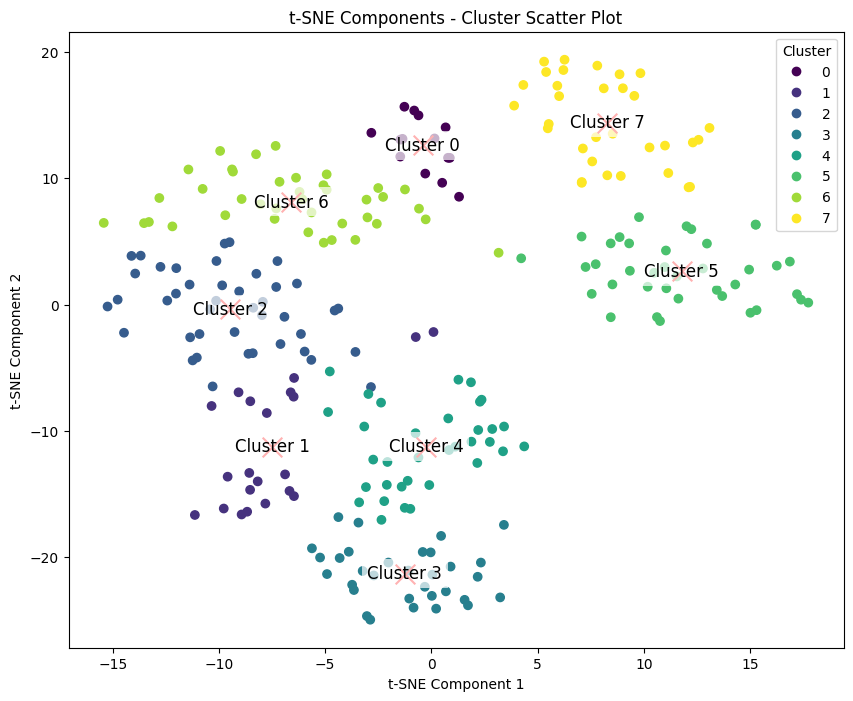

True number of documents in each category according to the class labels: [27 35 39 36 27 32 24 32]
Number of elements assigned to each cluster: [14 21 42 32 34 38 39 32]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_bert, cluster_sizes_bert = np.unique(kmeans.labels_, return_counts=True)

#Visualize the clusters using the t-SNE reduced data
plt.figure(figsize=(10, 8)) #normal 10,8
cluster_labels = kmeans.labels_

scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k):
    plt.text(embeddings_2d[cluster_labels == label, 0].mean(), embeddings_2d[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d[cluster_labels == label, 0].mean(), embeddings_2d[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_bert}")


In [ ]:
print(f"Number of elements assigned to each cluster: {cluster_sizes_bert}")

Number of elements assigned to each cluster: [14 21 42 32 34 38 39 32]


### **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters

In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


Applies the fit_and_evaluate function and visualizes it

clustering done in 4.21 ± 0.57 s 
Homogeneity: 0.755 ± 0.021
Completeness: 0.774 ± 0.018
V-measure: 0.764 ± 0.019
Adjusted Rand-Index: 0.670 ± 0.036
Silhouette Coefficient: 0.097 ± 0.002


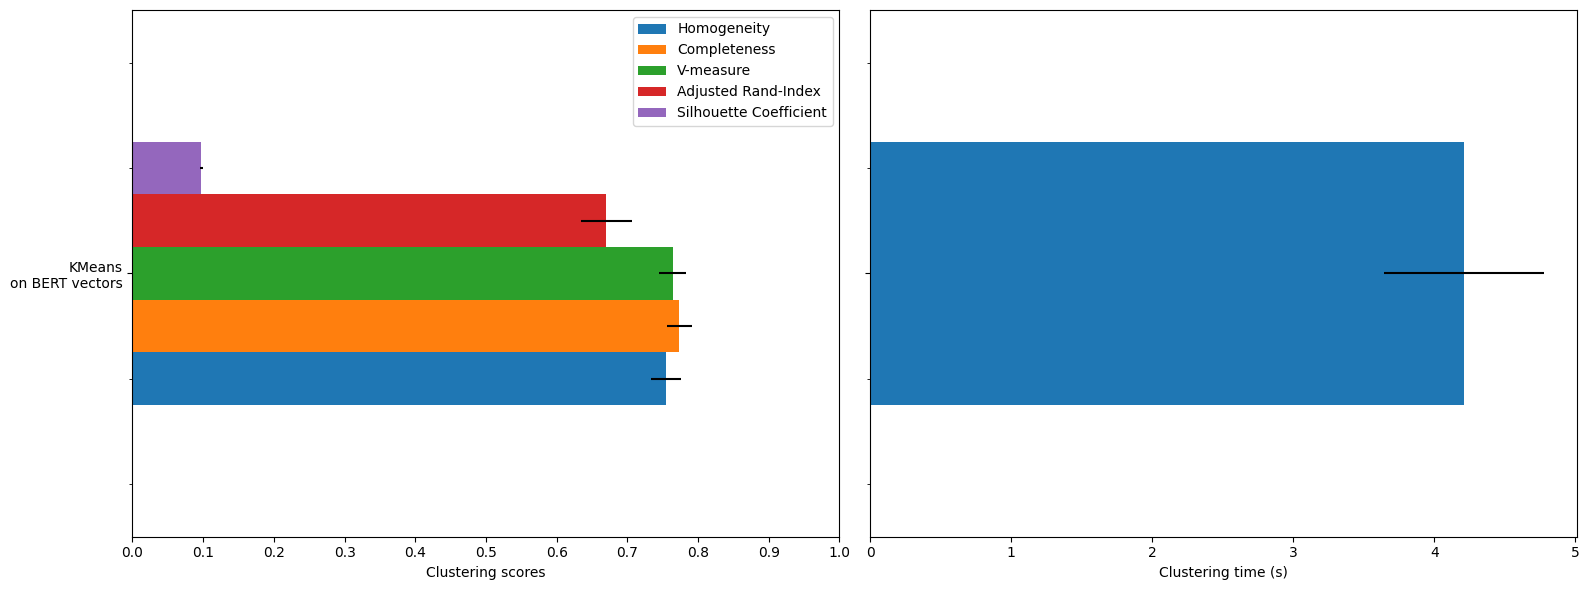

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans, embeddings, name="KMeans\non BERT vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

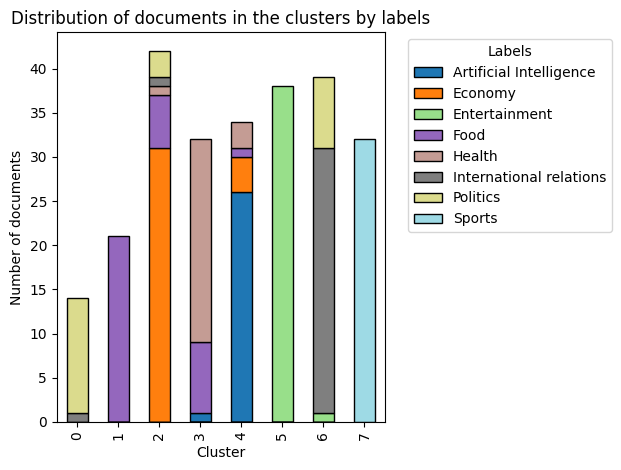

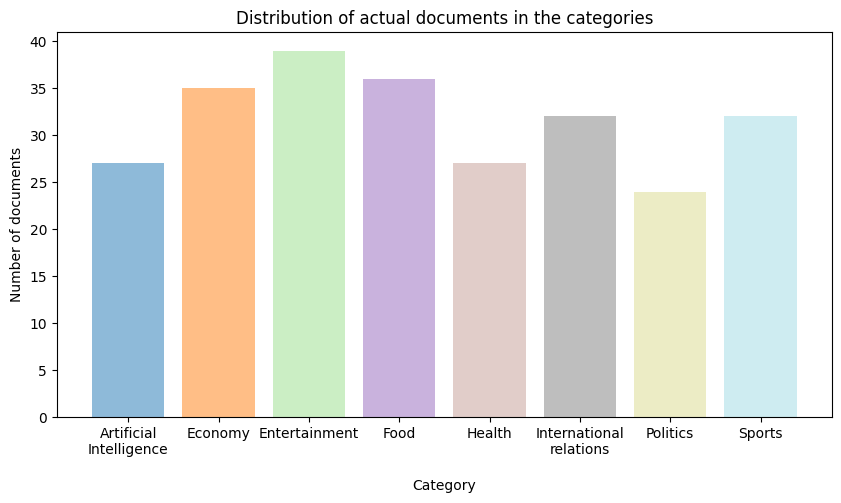


Distribution of documents in the clusters according to labels:
true_label  Artificial Intelligence   Economy  Entertainment  Food  Health  \
cluster                                                                      
0                                  0        0              0     0       0   
1                                  0        0              0    21       0   
2                                  0       31              0     6       1   
3                                  1        0              0     8      23   
4                                 26        4              0     1       3   
5                                  0        0             38     0       0   
6                                  0        0              1     0       0   
7                                  0        0              0     0       0   

true_label  International relations  Politics  Sports  
cluster                                                
0                                 1        

In [ ]:
x_labels = news_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes)), category_sizes, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_bert):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_df[news_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the BERT vectors of the documents in the current category.
        category_bert = embeddings[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_bert)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for Economy: 0.7805726636357668
Average Cosine Similarity for Health: 0.8173285590277778
Average Cosine Similarity for Sports: 0.6946713232224987
Average Cosine Similarity for Entertainment: 0.6964393028846154
Average Cosine Similarity for Politics: 0.7560224671294724
Average Cosine Similarity for International relations: 0.7682186249763735
Average Cosine Similarity for Food: 0.7424063546316965
Average Cosine Similarity for Artificial Intelligence : 0.7944367237580128


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  #Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_df[news_df['Category'] == category1].index
    category1_vector = embeddings[indices1]

    #Extract the documents in the second category
    indices2 = news_df[news_df['Category'] == category2].index
    category2_vector = embeddings[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between Economy and Health: 0.6761859655380249
Average Cosine Similarity between Sports and Entertainment: 0.6349523663520813
Average Cosine Similarity between Politics and International relations: 0.7292578816413879
Average Cosine Similarity between Food and Artificial Intelligence : 0.7034575343132019


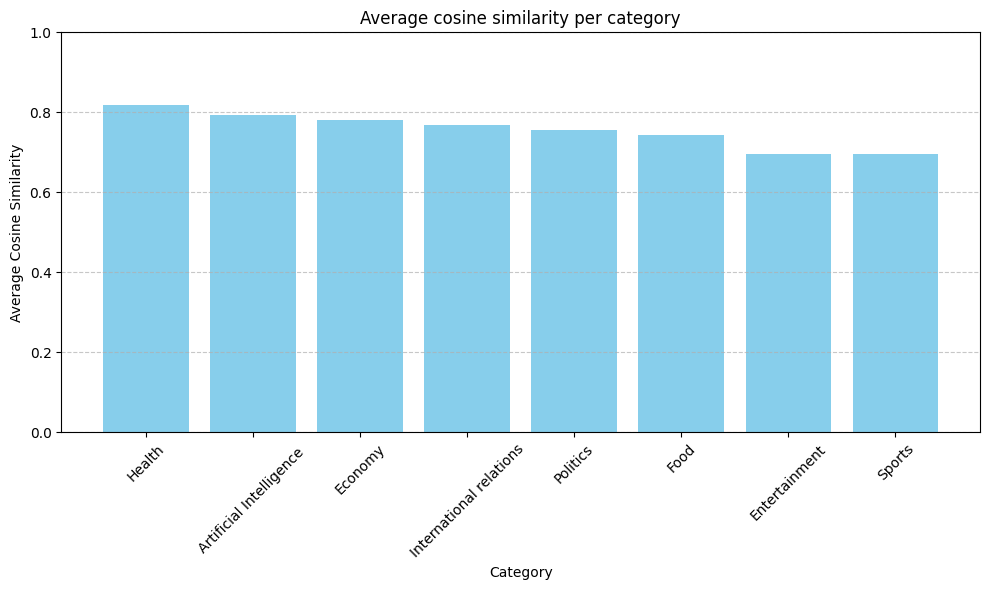

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  #Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

## **CLS Embedding**

### **Embedding Method**

With this function we get the BERT embedding of a document. In contrast to The average of the last layer hidden states over all tokens in the input sequence, the CLS token is used here, which was optimized during BERT's training to provide a summary of the entire sequence.

In [ ]:
#Define a function to get the BERT [CLS] token embedding for a given text
def get_bert_cls_embedding(text):
    #Tokenize the input text and return the result as PyTorch tensors
    #Truncate sequences longer than 512 tokens and pad sequences shorter than 512 tokens
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}

    #Disable gradient calculation since we are only doing inference
    with torch.no_grad():
        #Pass the tokenized input through the BERT model to get the outputs
        outputs = model(**inputs)

    #Extract the embedding of the [CLS] token
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

    #Return the [CLS] token embedding
    return cls_embedding

This code calculates the BERT embeddings for each text in the 'News' column of the news_df DataFrame and stores the resulting embeddings in a NumPy array called cls_embeddings.

In [ ]:
#Create an empty list to store the embeddings
cls_embeddings = []

#Iterate over each text in the 'News' column of the DataFrame and compute its BERT embedding
for text in news_df['News']:
    #Call the function 'get_bert_embedding' to get the BERT embedding for the current text
    embedding = get_bert_cls_embedding(text)

    #Append the embedding to the list of embeddings
    cls_embeddings.append(embedding)

#Convert the list of embeddings into a NumPy array
cls_embeddings = np.array(cls_embeddings)

Print the shape of the embeddings. The first number in the tuple represents the number of documents and the second number the hidden dimensions

In [ ]:
print(cls_embeddings.shape)

(252, 768)


BERT embeddings ​​of the first document.

In [ ]:
#Display the Embeddings of the first document
print(text_data[0])
print(cls_embeddings[0])

the imf now expects china's economy to grow by 5.4% this year, higher than previous estimates. this reflects china's shift away from its zero-covid policy and increased government stimulus.
[-5.14407516e-01 -2.57304162e-01  3.51245344e-01 -2.83011317e-01
 -4.67229158e-01 -2.85780020e-02  3.80503327e-01  3.37759256e-01
 -1.94031537e-01 -4.09626901e-01 -1.15426943e-01 -2.45910794e-01
 -3.53408754e-01  3.34029555e-01  3.00178882e-02 -6.63415119e-02
  2.21552141e-02  5.10108054e-01  4.02824670e-01 -1.43311277e-01
  1.16721533e-01 -9.02696997e-02  6.41910493e-01  1.51794821e-01
  1.25011414e-01 -8.63641083e-01  8.95964801e-02 -6.08935714e-01
  9.20436233e-02 -3.49965431e-02 -3.78583997e-01  3.48901182e-01
 -1.11876905e+00 -2.66398102e-01  5.21659017e-01 -1.36697724e-01
 -6.83046222e-01 -1.18207291e-01 -9.13981870e-02  5.21360457e-01
 -9.50252712e-01 -2.38984451e-01 -3.51711996e-02  1.54238880e-01
 -3.25596929e-01 -3.14525545e-01 -3.51520896e+00 -6.03400245e-02
 -4.60922569e-01  9.46981534e-

Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data[40])
print("Second news article:")
print(text_data[216])
print("Embedding of first document:")
print(cls_embeddings[40])
print("Embedding of second document:")
print(cls_embeddings[216])

First news article:
conor mcgregor, the ufc's biggest star, has announced his return to the octagon in 2024. mcgregor has been on the sidelines since suffering a leg injury in july 2021, but he is now fully recovered and ready to get back in the cage. his opponent and fight date are yet to be determined, but mcgregor's return is sure to generate excitement among mma fans.
Second news article:
the highly anticipated rubber match between ufc stars dustin poirier and conor mcgregor is finally happening, promising an electrifying showdown.
Embedding of first document:
[-9.52946365e-01 -2.62884796e-01  1.96340904e-02  3.81973498e-02
 -7.36045182e-01 -6.57796767e-03  3.52821380e-01  7.69315422e-01
  2.39012718e-01 -6.05908155e-01 -4.65882510e-01 -1.41156122e-01
 -2.18088388e-01  1.28097367e+00  7.71464884e-01 -1.16939075e-01
 -2.06394166e-01  2.92416066e-01  9.94264424e-01  1.60696343e-01
  1.61616638e-01 -2.99208909e-01  6.80132627e-01 -8.19839388e-02
  1.17311127e-01 -4.58765119e-01 -8.714

In [ ]:
print("First news article:")
print(text_data[138])
print("Second news article:")
print(text_data[139])
print("Embedding of first document:")
print(cls_embeddings[138])
print("Embedding of second document:")
print(cls_embeddings[139])

First news article:
the ai & big data expo, which took place in london on december 19-20, 2023, brought together experts from around the world to discuss the latest advances in artificial intelligence and big data. one of the key themes of the expo was how to use ai to get the most value out of real-time data streams.
Second news article:
the ai & big data expo also focused on the ethical implications of ai and big data. one of the sessions at the expo discussed the importance of using data for good, such as to improve healthcare and education.
Embedding of first document:
[-3.62057269e-01 -3.01023990e-01  7.86449388e-02  1.32451490e-01
 -3.76110733e-01 -1.32128045e-01  2.21459091e-01  5.52317381e-01
  1.52925700e-01 -4.16050017e-01 -4.43174481e-01 -5.59099734e-01
 -4.06392187e-01  8.41821909e-01  3.07410568e-01 -2.02584356e-01
 -2.69713551e-01  3.42014134e-01  3.64165545e-01  1.81139290e-01
 -3.80831887e-03 -6.14049077e-01  5.63795805e-01  4.33248311e-01
 -4.27015543e-01 -3.44142199e-

Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([cls_embeddings[40]], [cls_embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.7872647047042847


Cosine similarity between AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([cls_embeddings[138]], [cls_embeddings[139]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.937730073928833


Cosine similarity between sports and AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([cls_embeddings[139]], [cls_embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.7348039150238037


### **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans = KMeans(
    n_clusters=true_k,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(cls_embeddings)



Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, t-SNE (t-Distributed Stochastic Neighbor Embedding) is used

In [ ]:
#Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,init='random')
cls_embeddings_2d = tsne.fit_transform(cls_embeddings)

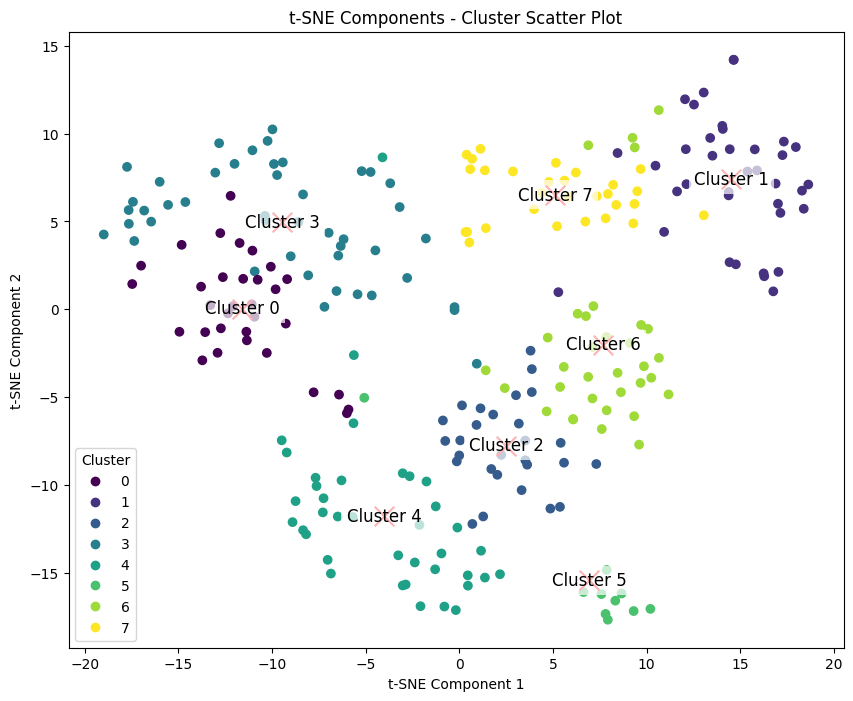

True number of documents in each category according to the class labels: [27 35 39 36 27 32 24 32]
Number of elements assigned to each cluster: [32 37 28 45 38 10 33 29]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_bert, cluster_sizes_bert = np.unique(kmeans.labels_, return_counts=True)

#Visualize the clusters using the t-SNE reduced data
plt.figure(figsize=(10, 8))
cluster_labels = kmeans.labels_

scatter = plt.scatter(cls_embeddings_2d[:, 0], cls_embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k):
    plt.text(cls_embeddings_2d[cluster_labels == label, 0].mean(), cls_embeddings_2d[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(cls_embeddings_2d[cluster_labels == label, 0].mean(), cls_embeddings_2d[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_bert}")


### **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters

In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

Applies the fit_and_evaluate function and visualizes it

clustering done in 2.49 ± 0.40 s 
Homogeneity: 0.578 ± 0.023
Completeness: 0.600 ± 0.027
V-measure: 0.588 ± 0.025
Adjusted Rand-Index: 0.416 ± 0.026
Silhouette Coefficient: 0.077 ± 0.004


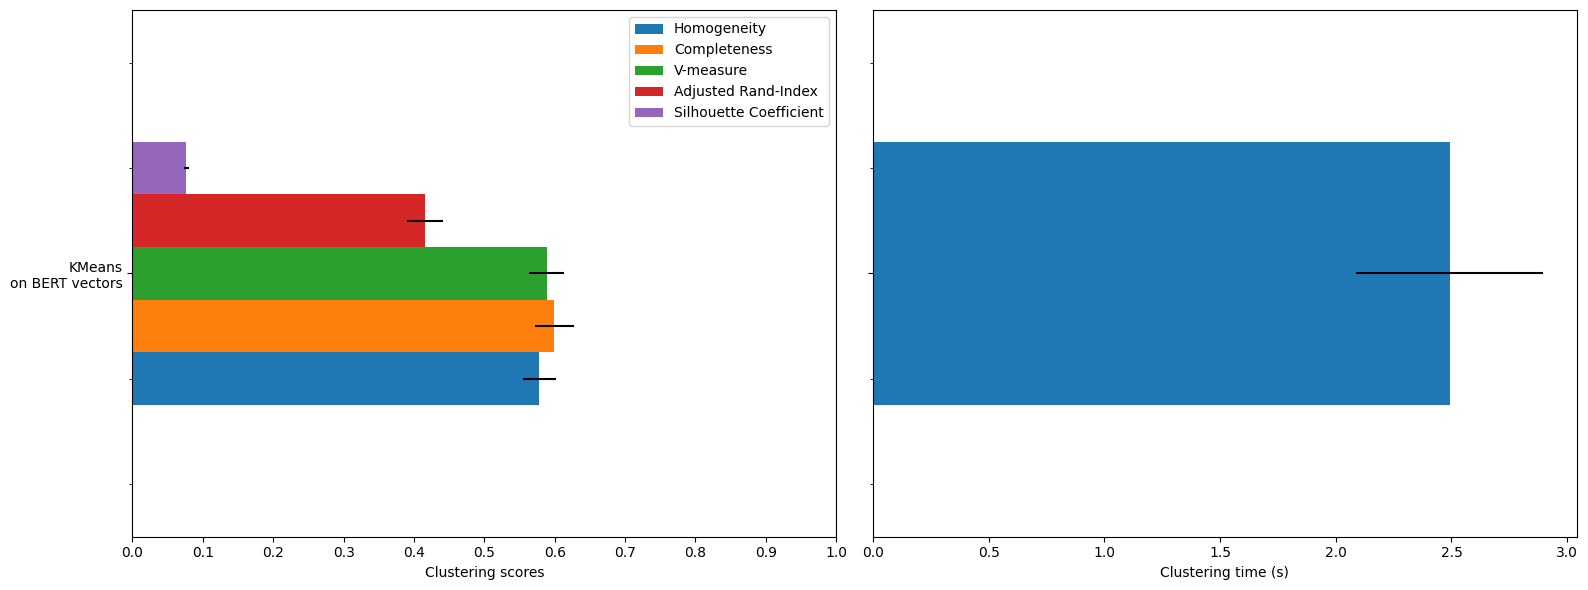

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans, cls_embeddings, name="KMeans\non BERT vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

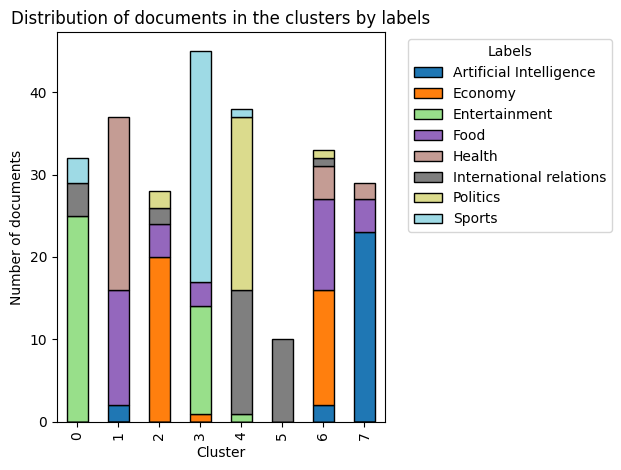

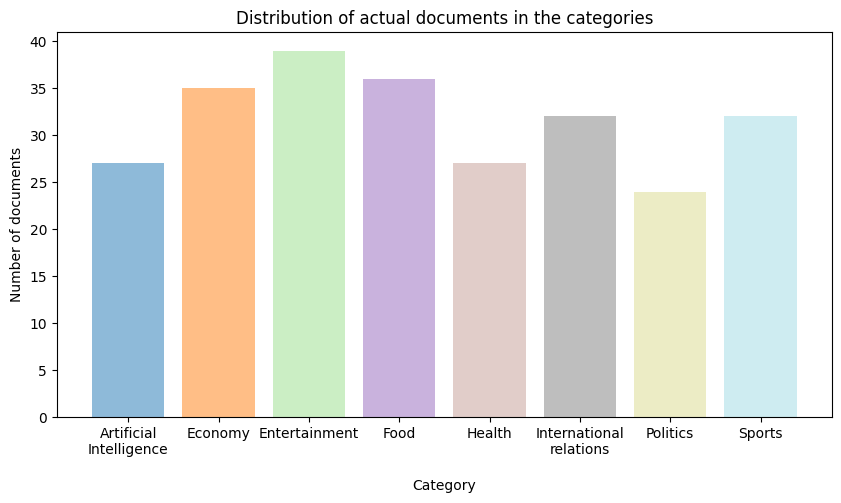


Distribution of documents in the clusters according to labels:
true_label  Artificial Intelligence   Economy  Entertainment  Food  Health  \
cluster                                                                      
0                                  0        0             25     0       0   
1                                  2        0              0    14      21   
2                                  0       20              0     4       0   
3                                  0        1             13     3       0   
4                                  0        0              1     0       0   
5                                  0        0              0     0       0   
6                                  2       14              0    11       4   
7                                 23        0              0     4       2   

true_label  International relations  Politics  Sports  
cluster                                                
0                                 4        

In [ ]:
x_labels = news_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes)), category_sizes, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_bert):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_df[news_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the BERT vectors of the documents in the current category.
        category_bert = cls_embeddings[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_bert)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for Economy: 0.8443111131171218
Average Cosine Similarity for Health: 0.8048403487246261
Average Cosine Similarity for Sports: 0.7789603202573715
Average Cosine Similarity for Entertainment: 0.7933651078567814
Average Cosine Similarity for Politics: 0.8009139351222826
Average Cosine Similarity for International relations: 0.7569789886474609
Average Cosine Similarity for Food: 0.7657643151661706
Average Cosine Similarity for Artificial Intelligence : 0.8390422071147169


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  #Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_df[news_df['Category'] == category1].index
    category1_vector = cls_embeddings[indices1]

    #Extract the documents in the second category
    indices2 = news_df[news_df['Category'] == category2].index
    category2_vector = cls_embeddings[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between Economy and Health: 0.7250773906707764
Average Cosine Similarity between Sports and Entertainment: 0.7531636953353882
Average Cosine Similarity between Politics and International relations: 0.7485039830207825
Average Cosine Similarity between Food and Artificial Intelligence : 0.7552276253700256


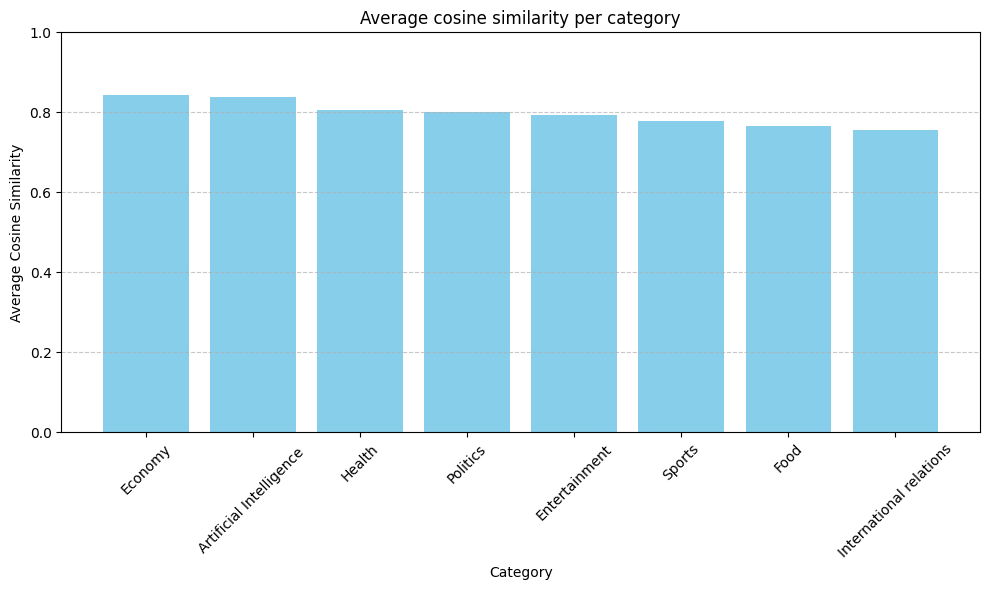

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  #Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

## **Last 4 Layer**  

### **Embedding Method**

In this method we want to use the last four layer of the bert model to get the embeddings.

In [ ]:
#Define a function to get the BERT embedding by concatenating the last four layers
def get_bert_four_layer_embedding(text, layers=[-4, -3, -2, -1]):
    #Tokenize the input text and return the result as PyTorch tensors
    #Truncate sequences longer than 512 tokens and pad sequences shorter than 512 tokens
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}

    #Disable gradient calculation since we are only doing inference
    with torch.no_grad():
        #Pass the tokenized input through the BERT model to get the outputs
        outputs = model(**inputs)

        #Extract the last four hidden layers from the model outputs
        last_four_layers = outputs.hidden_states[-4:]

        #Concatenate the selected layers along the last dimension
        concated_layers = torch.cat(last_four_layers, dim=-1)

    #Compute the mean of the concatenated layers across the sequence length dimension (dim=1)
    #Return the result as a NumPy array
    return concated_layers.mean(dim=1).squeeze().cpu().numpy()

This code calculates the BERT embeddings for each text in the 'News' column of the news_df DataFrame and stores the resulting embeddings in a NumPy array called cls_embeddings.

In [ ]:
#Create an empty list to store the embeddings
layer_embeddings = []

#Iterate over each text in the 'News' column of the DataFrame and compute its BERT embedding
for text in news_df['News']:
    #Call the function 'get_bert_embedding' to get the BERT embedding for the current text
    embedding = get_bert_four_layer_embedding(text)

    #Append the embedding to the list of embeddings
    layer_embeddings.append(embedding)

#Convert the list of embeddings into a NumPy array
layer_embeddings = np.array(layer_embeddings)

Print the shape of the embeddings. The first number in the tuple represents the number of documents and the second number the hidden dimensions

In [ ]:
print(layer_embeddings.shape)

(252, 3072)


BERT embeddings ​​of the first document.

In [ ]:
#Display the Embeddings of the first document
print("First document: " + text_data[0])
print("embedding for the document: ")
print(layer_embeddings[0])

First document: the imf now expects china's economy to grow by 5.4% this year, higher than previous estimates. this reflects china's shift away from its zero-covid policy and increased government stimulus.
embedding for the document: 
[-0.445659   -0.26496992  0.23223048 ... -0.3187164   0.07036883
 -0.22217926]


Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data[40])
print("Second news article:")
print(text_data[216])
print("Embedding of first document:")
print(layer_embeddings[40])
print("Embedding of second document:")
print(layer_embeddings[216])

First news article:
conor mcgregor, the ufc's biggest star, has announced his return to the octagon in 2024. mcgregor has been on the sidelines since suffering a leg injury in july 2021, but he is now fully recovered and ready to get back in the cage. his opponent and fight date are yet to be determined, but mcgregor's return is sure to generate excitement among mma fans.
Second news article:
the highly anticipated rubber match between ufc stars dustin poirier and conor mcgregor is finally happening, promising an electrifying showdown.
Embedding of first document:
[-0.2155467  -0.28274655  0.07073442 ...  0.00156128 -0.1078925
 -0.31014824]
Embedding of second document:
[-0.12505083 -0.40764755  0.35016435 ... -0.06707573  0.00679153
 -0.6946008 ]


In [ ]:
print("First news article:")
print(text_data[138])
print("Second news article:")
print(text_data[139])
print("Embedding of first document:")
print(layer_embeddings[138])
print("Embedding of second document:")
print(layer_embeddings[139])

First news article:
the ai & big data expo, which took place in london on december 19-20, 2023, brought together experts from around the world to discuss the latest advances in artificial intelligence and big data. one of the key themes of the expo was how to use ai to get the most value out of real-time data streams.
Second news article:
the ai & big data expo also focused on the ethical implications of ai and big data. one of the sessions at the expo discussed the importance of using data for good, such as to improve healthcare and education.
Embedding of first document:
[-0.3254694  -0.26132977  0.26557782 ... -0.18464357  0.0118269
 -0.13898274]
Embedding of second document:
[-0.15206134 -0.21759017 -0.07185579 ... -0.12675036 -0.11107499
 -0.20991528]


Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([layer_embeddings[40]], [layer_embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.8143166899681091


Cosine similarity between AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([layer_embeddings[138]], [layer_embeddings[139]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.9245175123214722


Cosine similarity between sports and AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([layer_embeddings[139]], [layer_embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.625958263874054


### **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans = KMeans(
    n_clusters=true_k,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(layer_embeddings)



Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, t-SNE (t-Distributed Stochastic Neighbor Embedding) is used

In [ ]:
#Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,init='random')
layer_embeddings_2d = tsne.fit_transform(layer_embeddings)

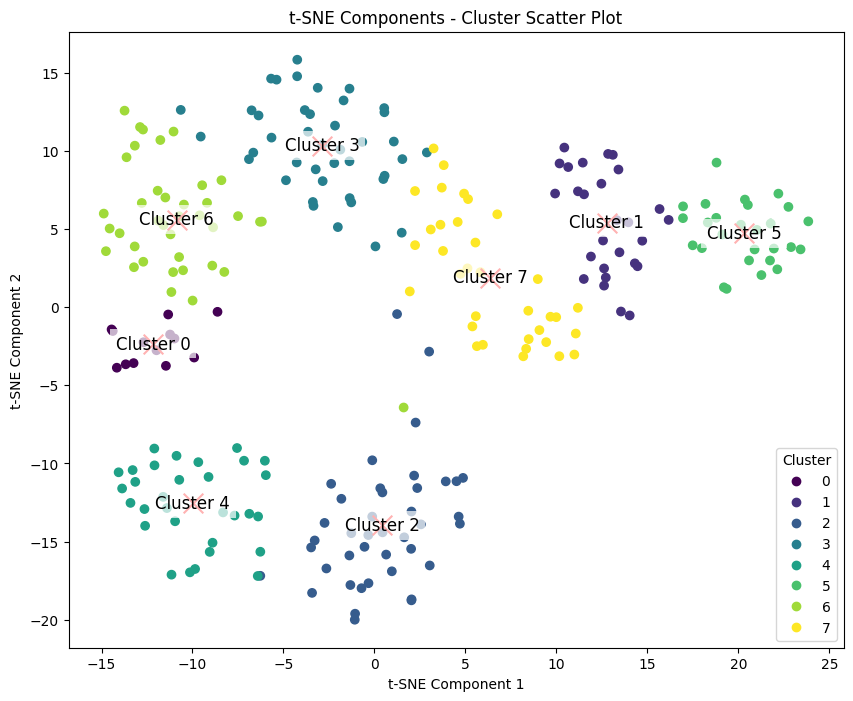

True number of documents in each category according to the class labels: [27 35 39 36 27 32 24 32]
Number of elements assigned to each cluster: [13 27 41 41 31 27 38 34]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_bert, cluster_sizes_bert = np.unique(kmeans.labels_, return_counts=True)

#Visualize the clusters using the t-SNE reduced data
plt.figure(figsize=(10, 8))
cluster_labels = kmeans.labels_

scatter = plt.scatter(layer_embeddings_2d[:, 0], layer_embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k):
    plt.text(layer_embeddings_2d[cluster_labels == label, 0].mean(), layer_embeddings_2d[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(layer_embeddings_2d[cluster_labels == label, 0].mean(), layer_embeddings_2d[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_bert}")


### **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters

In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

Applies the fit_and_evaluate function and visualizes it

clustering done in 3.26 ± 0.69 s 
Homogeneity: 0.730 ± 0.026
Completeness: 0.745 ± 0.028
V-measure: 0.738 ± 0.027
Adjusted Rand-Index: 0.647 ± 0.033
Silhouette Coefficient: 0.100 ± 0.004


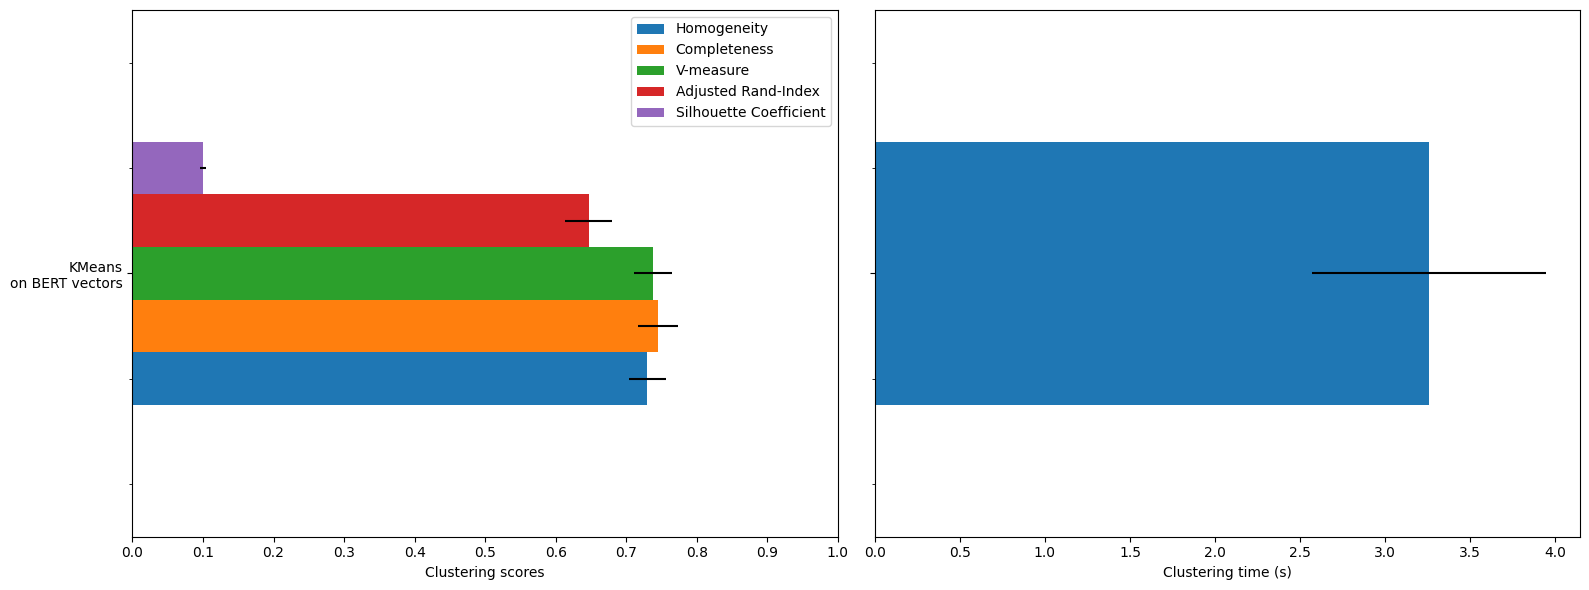

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans, layer_embeddings, name="KMeans\non BERT vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

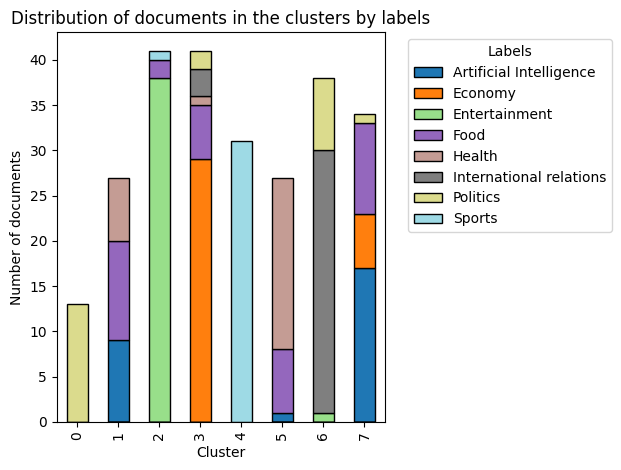

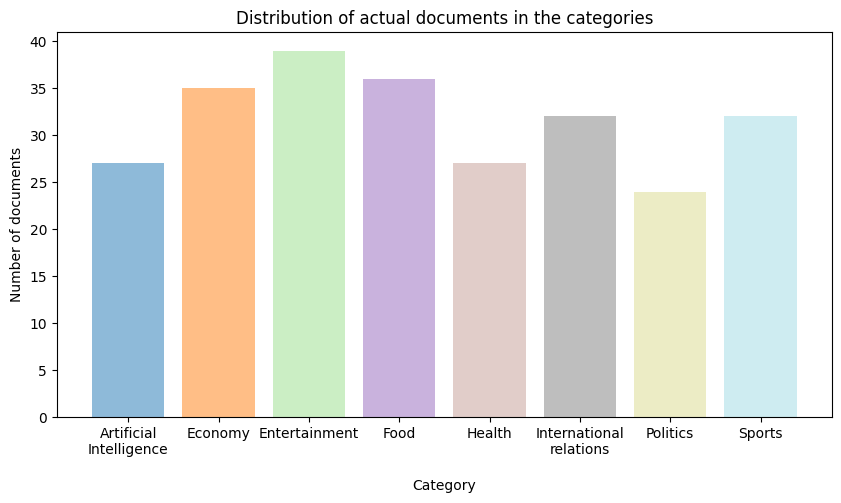


Distribution of documents in the clusters according to labels:
true_label  Artificial Intelligence   Economy  Entertainment  Food  Health  \
cluster                                                                      
0                                  0        0              0     0       0   
1                                  9        0              0    11       7   
2                                  0        0             38     2       0   
3                                  0       29              0     6       1   
4                                  0        0              0     0       0   
5                                  1        0              0     7      19   
6                                  0        0              1     0       0   
7                                 17        6              0    10       0   

true_label  International relations  Politics  Sports  
cluster                                                
0                                 0        

In [ ]:
x_labels = news_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes)), category_sizes, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_bert):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_df[news_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the BERT vectors of the documents in the current category.
        category_bert = layer_embeddings[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_bert)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for Economy: 0.7910420906643908
Average Cosine Similarity for Health: 0.8338024867565883
Average Cosine Similarity for Sports: 0.7082707189744518
Average Cosine Similarity for Entertainment: 0.718587569057861
Average Cosine Similarity for Politics: 0.7546019623245018
Average Cosine Similarity for International relations: 0.7847645667291456
Average Cosine Similarity for Food: 0.766266837952629
Average Cosine Similarity for Artificial Intelligence : 0.8241232847556089


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  #Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_df[news_df['Category'] == category1].index
    category1_vector = layer_embeddings[indices1]

    #Extract the documents in the second category
    indices2 = news_df[news_df['Category'] == category2].index
    category2_vector = layer_embeddings[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between Economy and Health: 0.697136402130127
Average Cosine Similarity between Sports and Entertainment: 0.6526728272438049
Average Cosine Similarity between Politics and International relations: 0.733712375164032
Average Cosine Similarity between Food and Artificial Intelligence : 0.7456223964691162


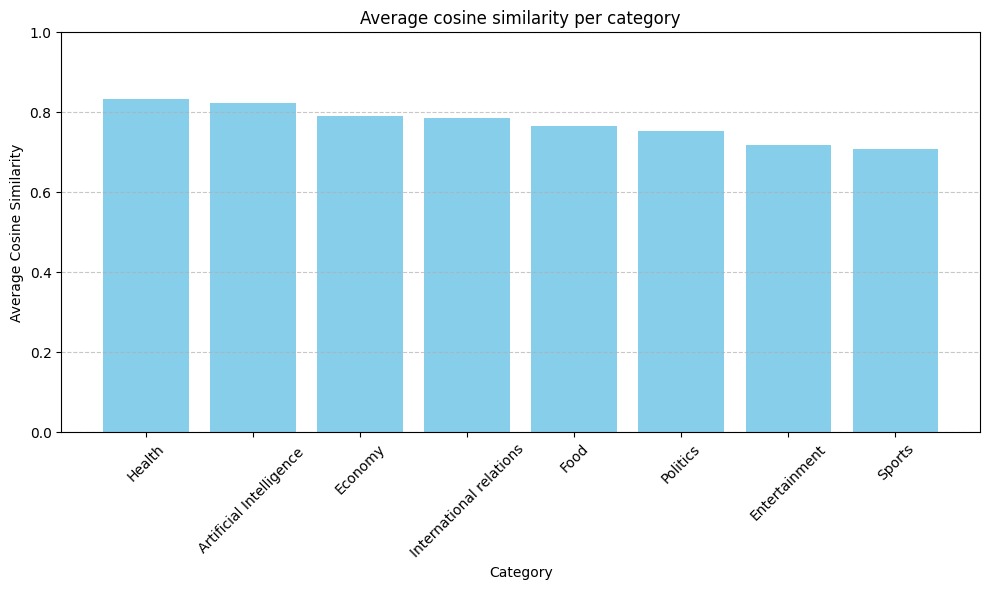

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

## **LAST 4 LAYER WITH CLS**

### **Embedding Method**

In this method we want to use the last four layer of the bert model to get the embeddings.

In [ ]:
#Define a function to get the BERT embedding by concatenating the last four layers, focusing on the [CLS] token
def get_bert_four_layer_embedding_cls(text, layers=[-4, -3, -2, -1]):
    #Tokenize the input text and return the result as PyTorch tensors
    #Truncate sequences longer than 512 tokens and pad sequences shorter than 512 tokens
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}

    #Disable gradient calculation since we are only doing inference
    with torch.no_grad():
        #Pass the tokenized input through the BERT model to get the outputs
        outputs = model(**inputs)

        #Select the specified hidden layers from the model outputs
        selected_layers = [outputs.hidden_states[i] for i in layers]

        #Concatenate the selected layers along the last dimension
        concated_layers = torch.cat(selected_layers, dim=-1)

    #Extract only the [CLS] token embedding from the concatenated layers (always the first token)
    cls_embedding = concated_layers[:, 0, :]

    #Compute the mean of the [CLS] token embedding across the layers and return as a NumPy array
    return cls_embedding.mean(dim=0).cpu().numpy()

This code calculates the BERT embeddings for each text in the 'News' column of the news_df DataFrame and stores the resulting embeddings in a NumPy array called cls_embeddings.

In [ ]:
#Create an empty list to store the embeddings
cls_layer_embeddings = []

#Iterate over each text in the 'News' column of the DataFrame and compute its BERT embedding
for text in news_df['News']:
    #Call the function 'get_bert_embedding' to get the BERT embedding for the current text
    embedding = get_bert_four_layer_embedding_cls(text)

    #Append the embedding to the list of embeddings
    cls_layer_embeddings.append(embedding)

#Convert the list of embeddings into a NumPy array
cls_layer_embeddings = np.array(cls_layer_embeddings)

Print the shape of the embeddings. The first number in the tuple represents the number of documents and the second number the hidden dimensions

In [ ]:
print(cls_layer_embeddings.shape)

(252, 3072)


BERT embeddings ​​of the first document.

In [ ]:
#Display the Embeddings of the first document
print(text_data[0])
print(cls_layer_embeddings[0])

the imf now expects china's economy to grow by 5.4% this year, higher than previous estimates. this reflects china's shift away from its zero-covid policy and increased government stimulus.
[ 0.16194904 -0.7358676  -0.3720792  ... -0.4385711   0.37611085
 -0.12685117]


Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data[40])
print("Second news article:")
print(text_data[216])
print("Embedding of first document:")
print(cls_layer_embeddings[40])
print("Embedding of second document:")
print(cls_layer_embeddings[216])

First news article:
conor mcgregor, the ufc's biggest star, has announced his return to the octagon in 2024. mcgregor has been on the sidelines since suffering a leg injury in july 2021, but he is now fully recovered and ready to get back in the cage. his opponent and fight date are yet to be determined, but mcgregor's return is sure to generate excitement among mma fans.
Second news article:
the highly anticipated rubber match between ufc stars dustin poirier and conor mcgregor is finally happening, promising an electrifying showdown.
Embedding of first document:
[-0.13211088 -0.5980044  -0.47948536 ... -0.31590846  0.45035326
 -0.08558264]
Embedding of second document:
[ 0.05216422 -0.5826625  -0.34831825 ... -0.48239595  0.44307363
 -0.15792875]


In [ ]:
print("First news article:")
print(text_data[138])
print("Second news article:")
print(text_data[139])
print("Embedding of first document:")
print(cls_layer_embeddings[138])
print("Embedding of second document:")
print(cls_layer_embeddings[139])

First news article:
the ai & big data expo, which took place in london on december 19-20, 2023, brought together experts from around the world to discuss the latest advances in artificial intelligence and big data. one of the key themes of the expo was how to use ai to get the most value out of real-time data streams.
Second news article:
the ai & big data expo also focused on the ethical implications of ai and big data. one of the sessions at the expo discussed the importance of using data for good, such as to improve healthcare and education.
Embedding of first document:
[ 0.1749998  -0.6938839  -0.39073    ... -0.34971374  0.24747783
  0.17114629]
Embedding of second document:
[ 0.07932825 -1.0513315  -0.428229   ... -0.28398612  0.39965057
  0.05489139]


Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([cls_layer_embeddings[40]], [cls_layer_embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.7996836304664612


Cosine similarity between AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([cls_layer_embeddings[138]], [cls_layer_embeddings[139]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.9401046633720398


Cosine similarity between sports and AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([cls_layer_embeddings[139]], [cls_layer_embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.7369537353515625


### **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans = KMeans(
    n_clusters=true_k,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(cls_layer_embeddings)



Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, t-SNE (t-Distributed Stochastic Neighbor Embedding) is used

In [ ]:
#Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,init='random')
cls_layer_embeddings_2d = tsne.fit_transform(cls_layer_embeddings)

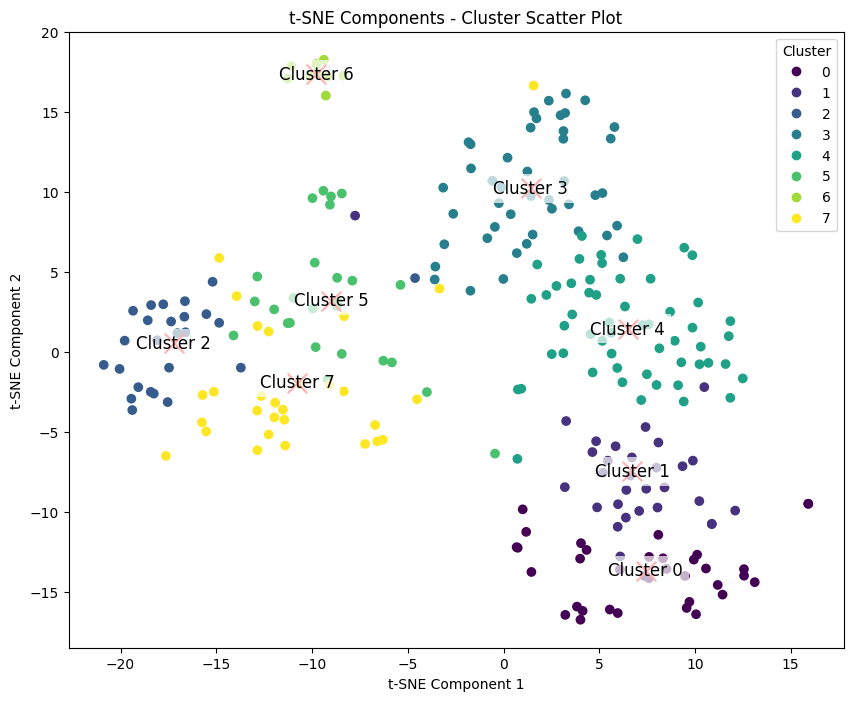

True number of documents in each category according to the class labels: [27 35 39 36 27 32 24 32]
Number of elements assigned to each cluster: [35 30 25 44 54 26  9 29]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_bert, cluster_sizes_bert = np.unique(kmeans.labels_, return_counts=True)

#Visualize the clusters using the t-SNE reduced data
plt.figure(figsize=(10, 8))
cluster_labels = kmeans.labels_

scatter = plt.scatter(cls_layer_embeddings_2d[:, 0], cls_layer_embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k):
    plt.text(cls_layer_embeddings_2d[cluster_labels == label, 0].mean(), cls_layer_embeddings_2d[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(cls_layer_embeddings_2d[cluster_labels == label, 0].mean(), cls_layer_embeddings_2d[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_bert}")


### **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters

In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

Applies the fit_and_evaluate function and visualizes it

clustering done in 2.85 ± 0.26 s 
Homogeneity: 0.532 ± 0.015
Completeness: 0.557 ± 0.018
V-measure: 0.544 ± 0.016
Adjusted Rand-Index: 0.360 ± 0.021
Silhouette Coefficient: 0.088 ± 0.006


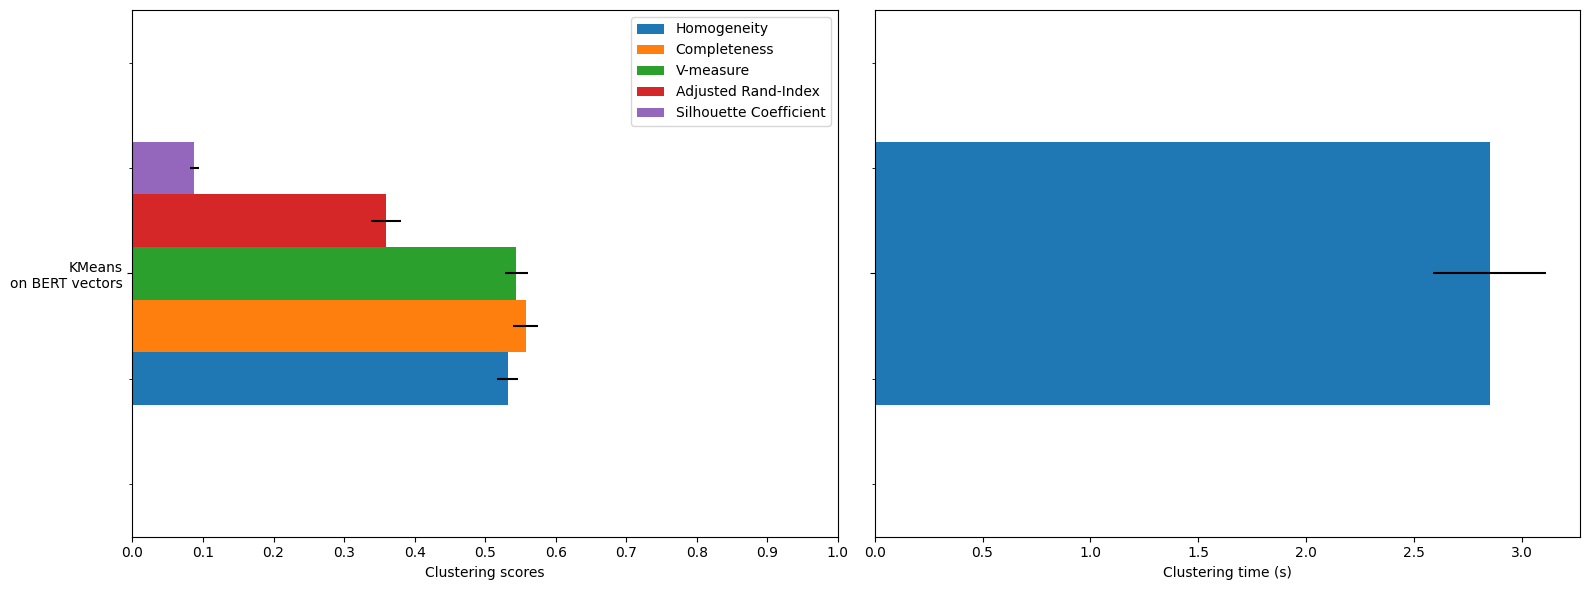

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans, cls_layer_embeddings, name="KMeans\non BERT vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

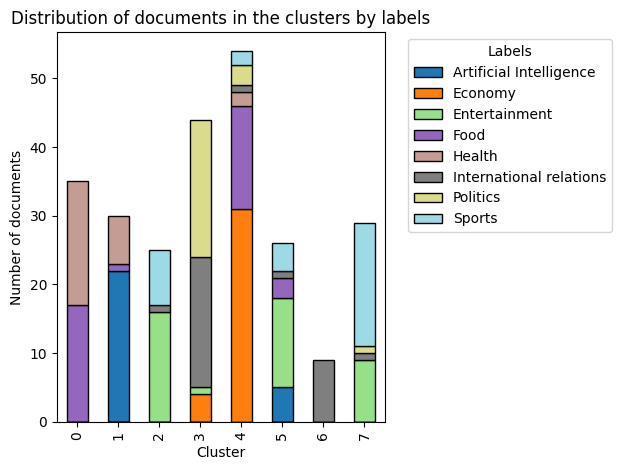

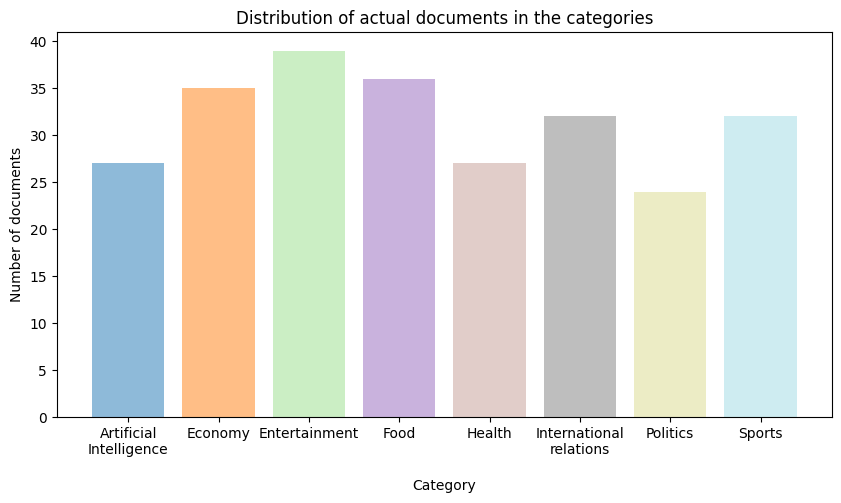


Distribution of documents in the clusters according to labels:
true_label  Artificial Intelligence   Economy  Entertainment  Food  Health  \
cluster                                                                      
0                                  0        0              0    17      18   
1                                 22        0              0     1       7   
2                                  0        0             16     0       0   
3                                  0        4              1     0       0   
4                                  0       31              0    15       2   
5                                  5        0             13     3       0   
6                                  0        0              0     0       0   
7                                  0        0              9     0       0   

true_label  International relations  Politics  Sports  
cluster                                                
0                                 0        

In [ ]:
x_labels = news_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes)), category_sizes, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_bert):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_df[news_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the BERT vectors of the documents in the current category.
        category_bert = cls_layer_embeddings[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_bert)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for Economy: 0.8629807929030987
Average Cosine Similarity for Health: 0.8523582175925926
Average Cosine Similarity for Sports: 0.7886907515987274
Average Cosine Similarity for Entertainment: 0.7871992391774207
Average Cosine Similarity for Politics: 0.8348671180614526
Average Cosine Similarity for International relations: 0.7551224000992314
Average Cosine Similarity for Food: 0.8173702179439484
Average Cosine Similarity for Artificial Intelligence : 0.8565710344885149


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  # Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_df[news_df['Category'] == category1].index
    category1_vector = cls_layer_embeddings[indices1]

    #Extract the documents in the second category
    indices2 = news_df[news_df['Category'] == category2].index
    category2_vector = cls_layer_embeddings[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between Economy and Health: 0.7832854390144348
Average Cosine Similarity between Sports and Entertainment: 0.7647811770439148
Average Cosine Similarity between Politics and International relations: 0.7578060626983643
Average Cosine Similarity between Food and Artificial Intelligence : 0.8091558814048767


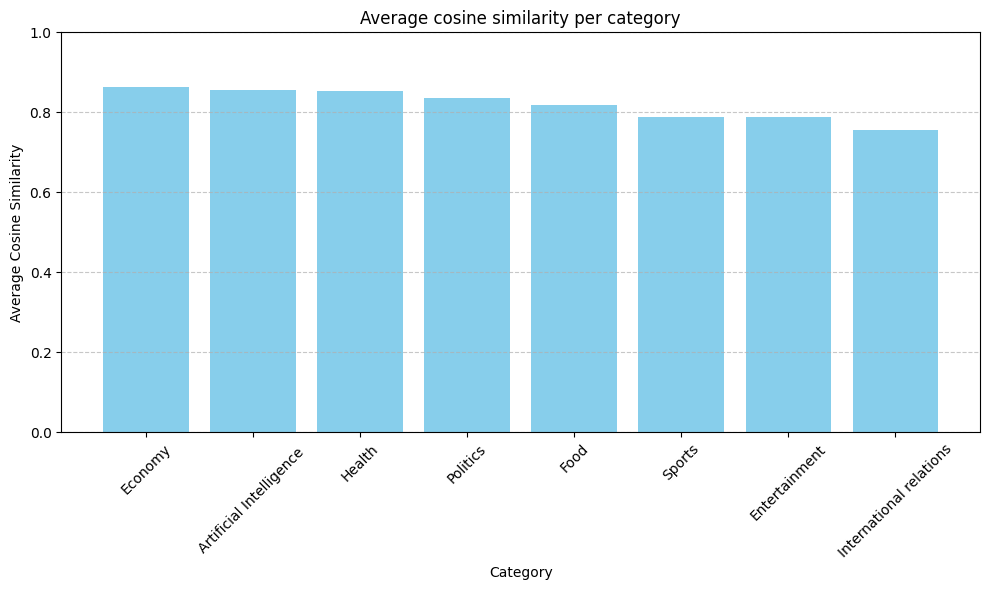

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  #Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

## **Middle Layer**

### **Embedding Method**

In this approach we use the middle layer of bert for docuement embedding

In [ ]:
#Define a function to get the BERT embedding by concatenating layers 4 to 8
def get_bert_embedding_layers_4_to_8(text):
    #Tokenize the input text and return the result as PyTorch tensors
    #Truncate sequences longer than 512 tokens and pad sequences shorter than 512 tokens
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}

    #Disable gradient calculation since we are only doing inference
    with torch.no_grad():
        #Pass the tokenized input through the BERT model to get the outputs
        outputs = model(**inputs)

        #Select hidden layers 4 to 8 from the model outputs
        selected_layers = outputs.hidden_states[4:9]

        # Concatenate the selected layers along the last dimension
        concatenated_layers = torch.cat(selected_layers, dim=-1)

    #Compute the mean of the concatenated layers across the sequence length dimension (dim=1)
    #Return the result as a NumPy array
    return concatenated_layers.mean(dim=1).squeeze().cpu().numpy()


This code calculates the BERT embeddings for each text in the 'News' column of the news_df DataFrame and stores the resulting embeddings in a NumPy array called cls_embeddings.

In [ ]:
#Create an empty list to store the embeddings
middle_layer_embeddings = []

#Iterate over each text in the 'News' column of the DataFrame and compute its BERT embedding
for text in news_df['News']:
    #Call the function 'get_bert_embedding' to get the BERT embedding for the current text
    embedding = get_bert_embedding_layers_4_to_8(text)

    #Append the embedding to the list of embeddings
    middle_layer_embeddings.append(embedding)

#Convert the list of embeddings into a NumPy array
middle_layer_embeddings = np.array(middle_layer_embeddings)

Print the shape of the embeddings. The first number in the tuple represents the number of documents and the second number the hidden dimensions

In [ ]:
print(middle_layer_embeddings.shape)

(252, 3840)


BERT embeddings ​​of the first document.

In [ ]:
#Display the Embeddings of the first document
print(text_data[0])
print(middle_layer_embeddings[0])

the imf now expects china's economy to grow by 5.4% this year, higher than previous estimates. this reflects china's shift away from its zero-covid policy and increased government stimulus.
[-0.28115755  0.03471341 -0.02362021 ... -0.27765897  0.28910345
  0.45996755]


Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data[40])
print("Second news article:")
print(text_data[216])
print("Embedding of first document:")
print(middle_layer_embeddings[40])
print("Embedding of second document:")
print(middle_layer_embeddings[216])

First news article:
conor mcgregor, the ufc's biggest star, has announced his return to the octagon in 2024. mcgregor has been on the sidelines since suffering a leg injury in july 2021, but he is now fully recovered and ready to get back in the cage. his opponent and fight date are yet to be determined, but mcgregor's return is sure to generate excitement among mma fans.
Second news article:
the highly anticipated rubber match between ufc stars dustin poirier and conor mcgregor is finally happening, promising an electrifying showdown.
Embedding of first document:
[-0.00080942 -0.18860339 -0.02658562 ... -0.092981   -0.001716
 -0.01162526]
Embedding of second document:
[-0.10219368 -0.17010255  0.17581865 ... -0.04070082  0.15815282
 -0.41233882]


In [ ]:
print("First news article:")
print(text_data[138])
print("Second news article:")
print(text_data[139])
print("Embedding of first document:")
print(middle_layer_embeddings[138])
print("Embedding of second document:")
print(middle_layer_embeddings[139])

First news article:
the ai & big data expo, which took place in london on december 19-20, 2023, brought together experts from around the world to discuss the latest advances in artificial intelligence and big data. one of the key themes of the expo was how to use ai to get the most value out of real-time data streams.
Second news article:
the ai & big data expo also focused on the ethical implications of ai and big data. one of the sessions at the expo discussed the importance of using data for good, such as to improve healthcare and education.
Embedding of first document:
[-0.14201301  0.17205107  0.1483756  ... -0.23362605  0.34698093
 -0.11433303]
Embedding of second document:
[-0.17433691  0.31591472  0.12621754 ... -0.11242718 -0.0550515
 -0.14458418]


Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([middle_layer_embeddings[40]], [middle_layer_embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.8507006168365479


Cosine similarity between AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([middle_layer_embeddings[138]], [middle_layer_embeddings[139]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.9324294328689575


Cosine similarity between sports and AI article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([middle_layer_embeddings[139]], [middle_layer_embeddings[216]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.7727774381637573


### **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans = KMeans(
    n_clusters=true_k,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(middle_layer_embeddings)



Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, t-SNE (t-Distributed Stochastic Neighbor Embedding) is used

In [ ]:
#Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,init='random')
middle_layer_embeddings_2d = tsne.fit_transform(middle_layer_embeddings)

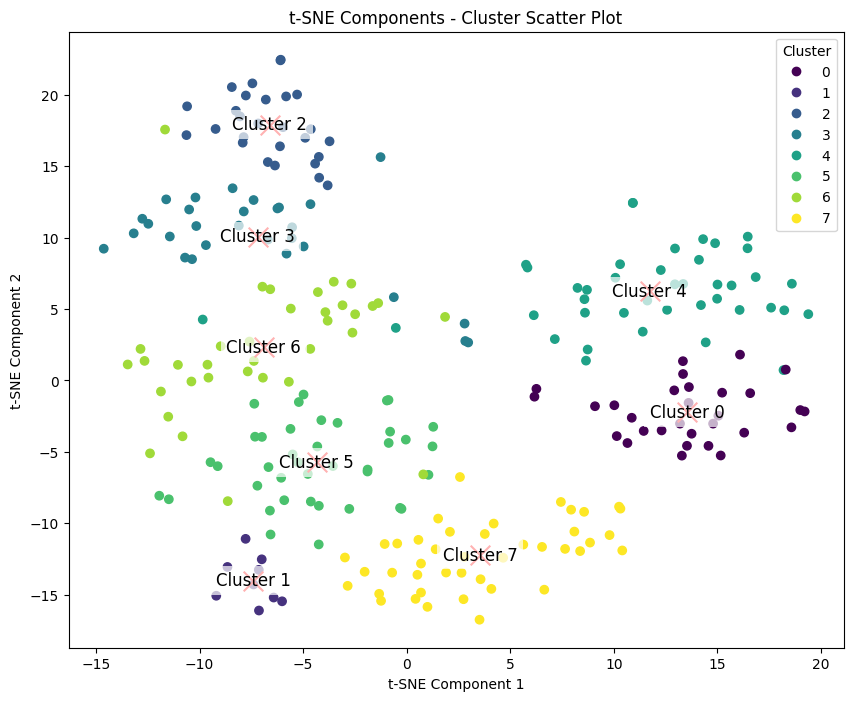

True number of documents in each category according to the class labels: [27 35 39 36 27 32 24 32]
Number of elements assigned to each cluster: [30  9 27 29 41 39 35 42]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_bert, cluster_sizes_bert = np.unique(kmeans.labels_, return_counts=True)

#Visualize the clusters using the t-SNE reduced data
plt.figure(figsize=(10, 8))
cluster_labels = kmeans.labels_

scatter = plt.scatter(middle_layer_embeddings_2d[:, 0], middle_layer_embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k):
    plt.text(middle_layer_embeddings_2d[cluster_labels == label, 0].mean(), middle_layer_embeddings_2d[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(middle_layer_embeddings_2d[cluster_labels == label, 0].mean(), middle_layer_embeddings_2d[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_bert}")


### **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters

In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

Applies the fit_and_evaluate function and visualizes it

clustering done in 3.41 ± 0.58 s 
Homogeneity: 0.653 ± 0.012
Completeness: 0.666 ± 0.014
V-measure: 0.660 ± 0.013
Adjusted Rand-Index: 0.520 ± 0.019
Silhouette Coefficient: 0.077 ± 0.001


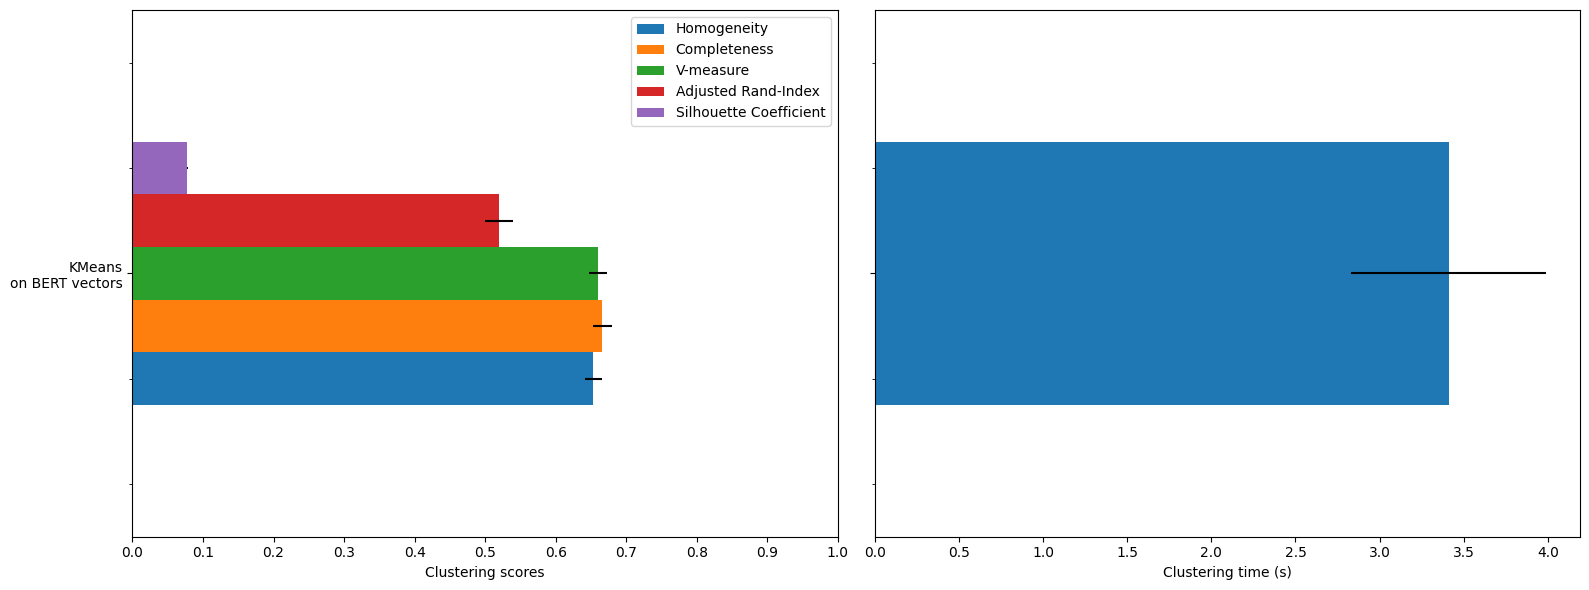

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans, middle_layer_embeddings, name="KMeans\non BERT vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

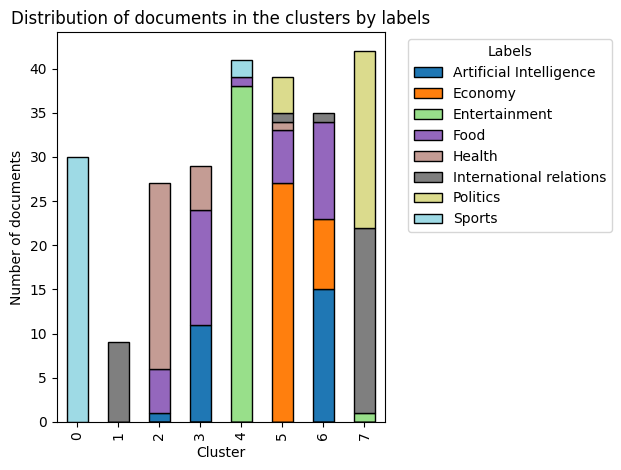

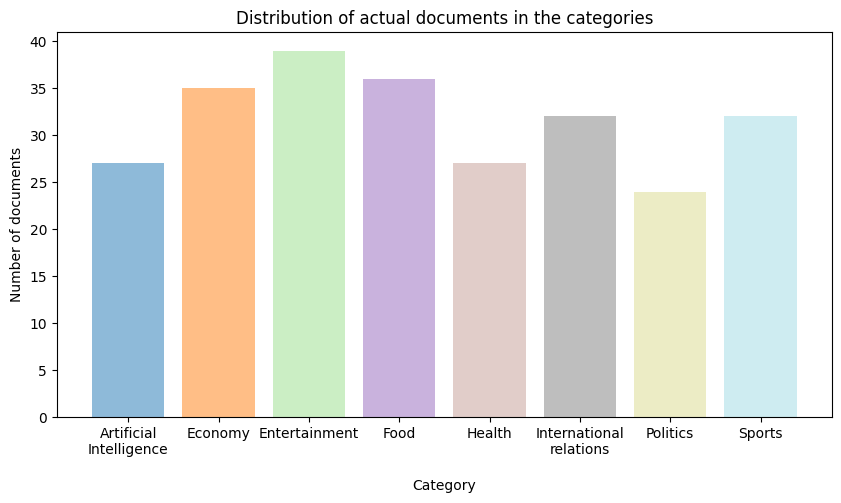


Distribution of documents in the clusters according to labels:
true_label  Artificial Intelligence   Economy  Entertainment  Food  Health  \
cluster                                                                      
0                                  0        0              0     0       0   
1                                  0        0              0     0       0   
2                                  1        0              0     5      21   
3                                 11        0              0    13       5   
4                                  0        0             38     1       0   
5                                  0       27              0     6       1   
6                                 15        8              0    11       0   
7                                  0        0              1     0       0   

true_label  International relations  Politics  Sports  
cluster                                                
0                                 0        

In [ ]:
x_labels = news_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes)), category_sizes, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_bert):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_df[news_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the BERT vectors of the documents in the current category.
        category_bert = middle_layer_embeddings[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_bert)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for Economy: 0.8596796628807774
Average Cosine Similarity for Health: 0.8907515914351852
Average Cosine Similarity for Sports: 0.828429929671749
Average Cosine Similarity for Entertainment: 0.8209862754090755
Average Cosine Similarity for Politics: 0.8581390933714051
Average Cosine Similarity for International relations: 0.8496568741336945
Average Cosine Similarity for Food: 0.8470815507192461
Average Cosine Similarity for Artificial Intelligence : 0.8813846946781517


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  #Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_df[news_df['Category'] == category1].index
    category1_vector = middle_layer_embeddings[indices1]

    #Extract the documents in the second category
    indices2 = news_df[news_df['Category'] == category2].index
    category2_vector = middle_layer_embeddings[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

# If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between Economy and Health: 0.8121647834777832
Average Cosine Similarity between Sports and Entertainment: 0.7958306670188904
Average Cosine Similarity between Politics and International relations: 0.8324529528617859
Average Cosine Similarity between Food and Artificial Intelligence : 0.8429926037788391


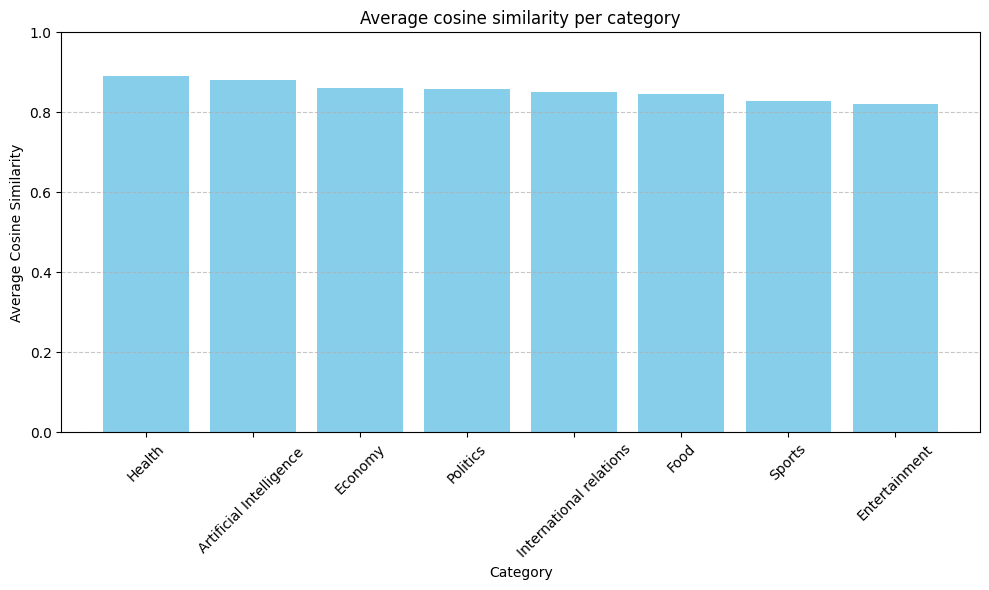

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  #Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

#**BERT Embedding With Second Dataset**

## **BERT Last Layer**

In this approach the last layer from BERT is used. This means the model represents the output after going through all layers.

### **Embedding Method**

With this function we get the BERT embedding of a document. The average of the last layer hidden states over all tokens in the input sequence is calculated to obtain a single vector representation of the entire sequence.

In [ ]:
#Function to get the BERT embedding for a given text
def get_bert_embedding(text):
    #Tokenize the input text and return the result as PyTorch tensors
    #Truncate sequences longer than 512 tokens and pad sequences shorter than 512 tokens
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    # Verschieben Sie die Eingaben auf das richtige Gerät
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}
    #Disable gradient calculation since we are only doing inference
    with torch.no_grad():
        #Pass the tokenized input through the BERT model to get the outputs
        outputs = model(**inputs)

    #Compute the mean of the last hidden states across the sequence length dimension and return a single embedding vector for the document
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

This code calculates the BERT embeddings for each text in the 'News' column of the news_df DataFrame and stores the resulting embeddings in a NumPy array called embeddings.



In [ ]:
#Create an empty list to store the embeddings
embeddings_two = []

#Iterate over each text in the 'News' column of the DataFrame and compute its BERT embedding
for text in news_two_df['News']:
    #Call the function 'get_bert_embedding' to get the BERT embedding for the current text
    embedding = get_bert_embedding(text)

    #Append the embedding to the list of embeddings
    embeddings_two.append(embedding)

#Convert the list of embeddings into a NumPy array
embeddings_two = np.array(embeddings_two)

Print the shape of the embeddings. The first number in the tuple represents the number of documents and the second number the hidden dimensions

In [ ]:
print(embeddings_two.shape)

(50000, 768)


BERT embeddings ​​of the first document.

In [ ]:
#Display the Embeddings of the first document
print(text_data_two[0])
print(embeddings_two[0])


resting is part of training. i've confirmed what i sort of already knew: i'm not built for running streaks. i'm built for hard workouts three to five days a week with lots of cross training, physical therapy and foam rolling. but i've also confirmed that i'm stubborn with myself.
[ 2.97226727e-01  2.52092555e-02 -8.67654830e-02 -1.31614223e-01
 -2.39880364e-02 -2.87355930e-01  4.79309529e-01  5.23691297e-01
 -3.26986313e-02 -1.30593434e-01  1.47408009e-01 -1.22907825e-01
 -2.04798386e-01  4.03523259e-02  4.40448523e-03  3.15432101e-01
  4.76634085e-01 -5.40352659e-03 -2.41795763e-01  7.69619465e-01
  8.07696953e-02  7.55422264e-02 -1.91479012e-01  6.87918782e-01
  2.94541955e-01  6.47629052e-02 -2.72784263e-01  1.38582438e-01
 -3.19039941e-01 -1.43151656e-01  4.59325880e-01 -8.20379257e-02
 -2.55173028e-01 -6.47050217e-02  1.72512621e-01 -1.90119877e-01
 -6.97085038e-02 -2.18432620e-01 -2.72961676e-01 -1.90048605e-01
 -6.07946515e-01 -3.27584177e-01 -3.20500195e-01  1.78073257e-01
 -1.

Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data_two[49085])
print("Second news article:")
print(text_data_two[48331])
print("Embedding of first document:")
print(embeddings_two[49085])
print("Embedding of second document:")
print(embeddings_two[48331])

First news article:
the nba would not allow griffin to use the car of his choice for the 2011 dunk contest.
Second news article:
an nba team is a business, but it also carries the imagery of representing that city.  sports and athletes can provide opportunities for positive role modeling and influencing attitudes -- when turned negative, the effects ripple.
Embedding of first document:
[-5.03762841e-01 -2.66213477e-01 -1.32583037e-01 -6.29437193e-02
  5.16422987e-01  1.49975061e-01 -3.15032974e-02  4.41542953e-01
 -7.92933907e-03 -6.50567487e-02  1.61642998e-01 -7.47961521e-01
 -1.92701504e-01 -1.72176883e-01 -8.52835029e-02  1.33008078e-01
  6.88736839e-03 -8.97420570e-03  4.35628355e-01  1.76529154e-01
  1.62825108e-01  2.12159947e-01  1.89952970e-01  4.00225043e-01
  2.60565341e-01 -1.31715447e-01  6.32129610e-02  6.78928673e-01
 -4.36284393e-01 -2.02771544e-01  4.91143495e-01  1.43195346e-01
 -4.69686598e-01 -2.47313574e-01 -6.33885562e-02 -2.07542390e-01
  1.79755419e-01 -1.305245

In [ ]:
print("First news article:")
print(text_data_two[34782])
print("Second news article:")
print(text_data_two[34767])
print("Embedding of first document:")
print(embeddings_two[34782])
print("Embedding of second document:")
print(embeddings_two[34767])

First news article:
pizza, hamburgers, hot dogs and oreos. we love these foods. it's mind-blowing the millions and billions of gallons and pounds we eat of each every year.
Second news article:
you say you love pizza? prove it.
Embedding of first document:
[ 3.02235335e-01  4.76244509e-01  3.78394216e-01  1.29153877e-01
  4.68308866e-01 -1.26665235e-01 -1.38101965e-01  9.61247087e-01
  1.00459330e-01 -3.08524221e-01  2.15684205e-01 -4.48381871e-01
 -3.87469023e-01  6.28893375e-01 -5.65394573e-02  3.96865070e-01
  1.76094815e-01  1.69524953e-01 -3.30104589e-01  5.69484890e-01
  8.70794356e-02 -2.94852227e-01 -2.12450862e-01  8.18352163e-01
  6.92336202e-01  2.25135714e-01 -2.05514222e-01 -1.94804877e-01
 -1.82405859e-01 -1.13889389e-01  5.20191491e-01  2.80152023e-01
 -1.52921721e-01 -2.71534920e-01  1.14576317e-01 -3.28340977e-01
 -2.21035913e-01 -1.47510618e-01 -1.53502887e-02  2.28307724e-01
 -4.15967166e-01 -3.75702262e-01  1.17748298e-01 -2.57018119e-01
 -7.02801049e-02 -9.96452346

Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([embeddings_two[49085]], [embeddings_two[48331]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.6182636022567749


Cosine similarity between food article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([embeddings_two[34782]], [embeddings_two[34767]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.6195383071899414


Cosine similarity between sports and food article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([embeddings_two[49085]], [embeddings_two[34782]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.5294297933578491


### **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans_two = KMeans(
    n_clusters=true_k_two,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(embeddings_two)

Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, SVD (Singular Value Decomposition) is used, cause it need less time and computing power.

In [ ]:
#Reducing the dimensions of the embeddings with PCA.
pca = PCA(n_components=2)
embeddings_2d_two = pca.fit_transform(embeddings_two)

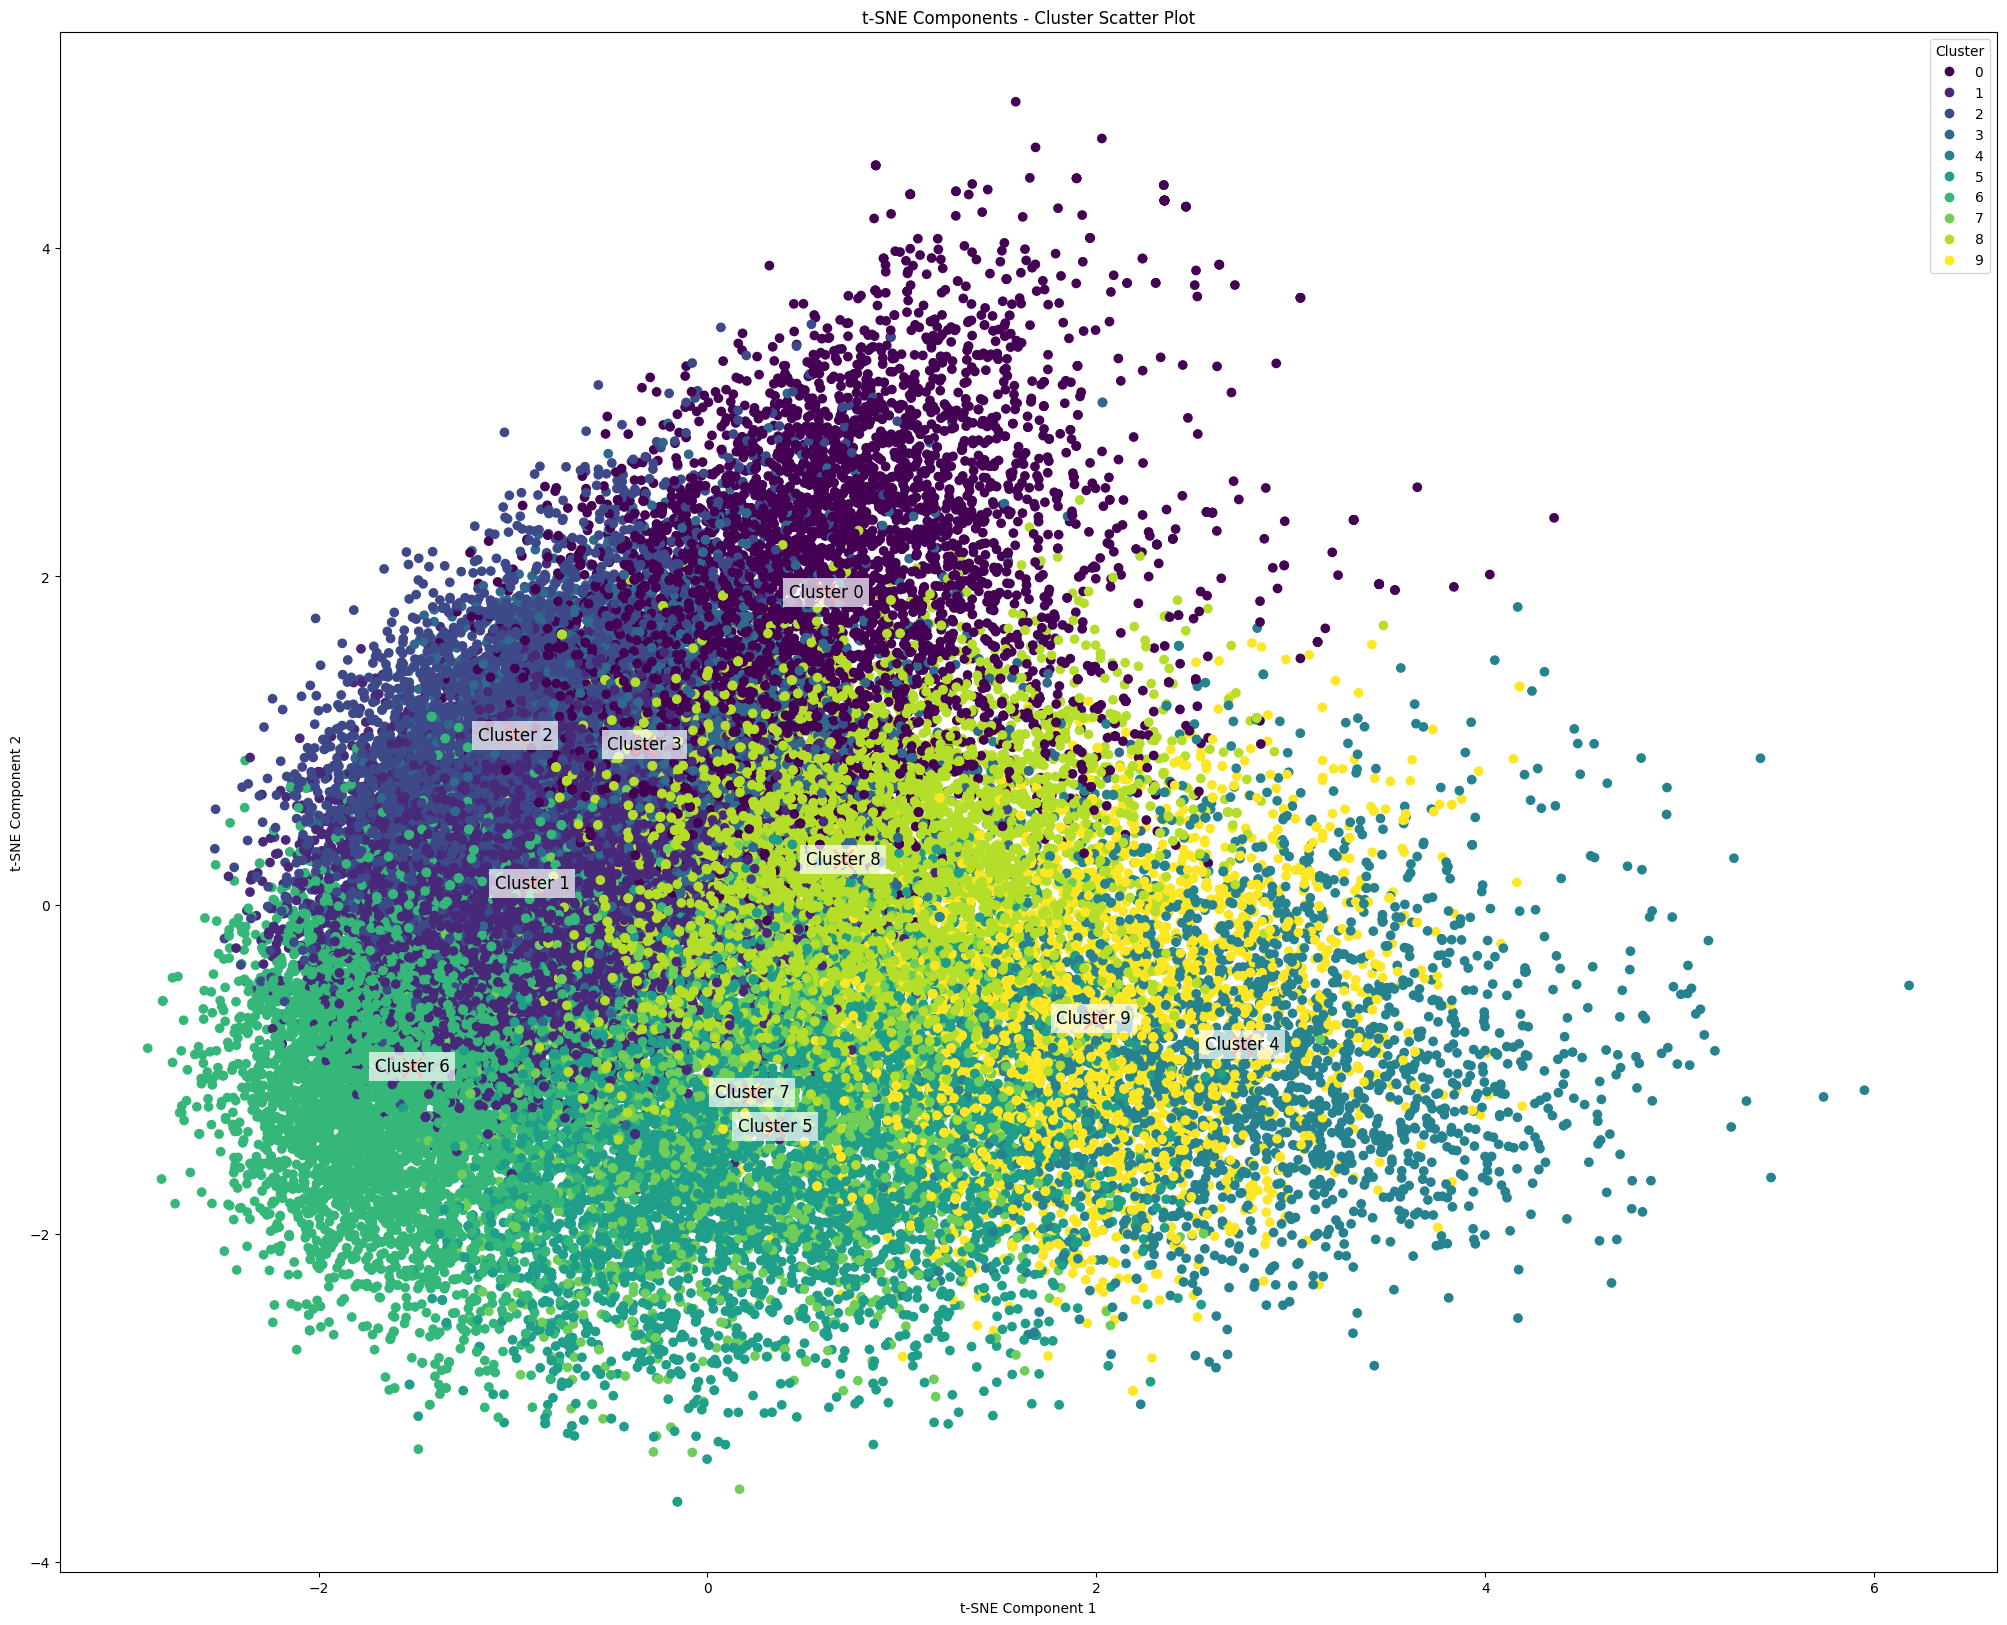

True number of documents in each category according to the class labels: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
Number of elements assigned to each cluster: [ 5273 10483  3030  4804  2310  5000  6221  3167  6112  3600]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_bert, cluster_sizes_bert = np.unique(kmeans_two.labels_, return_counts=True)

#Visualize the clusters using the PCA reduced data
plt.figure(figsize=(25, 20))
cluster_labels = kmeans_two.labels_

scatter = plt.scatter(embeddings_2d_two[:, 0], embeddings_2d_two[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k_two):
    plt.text(embeddings_2d_two[cluster_labels == label, 0].mean(), embeddings_2d_two[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d_two[cluster_labels == label, 0].mean(), embeddings_2d_two[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes_two}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_bert}")


### **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters


In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=1):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels_two, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels_two, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels_two, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels_two, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


Applies the fit_and_evaluate function and visualizes it

clustering done in 127.02 ± 0.00 s 
Homogeneity: 0.269 ± 0.000
Completeness: 0.280 ± 0.000
V-measure: 0.274 ± 0.000
Adjusted Rand-Index: 0.168 ± 0.000
Silhouette Coefficient: 0.012 ± 0.000


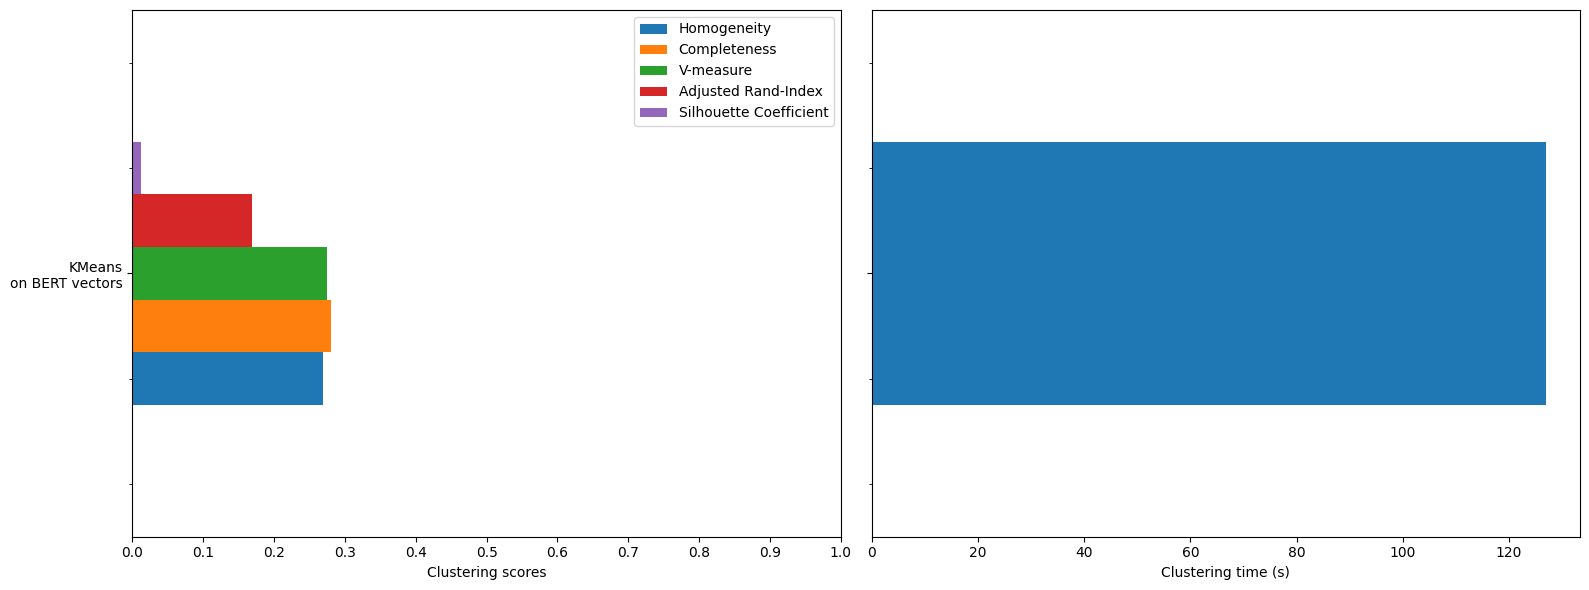

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans_two, embeddings_two, name="KMeans\non BERT vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

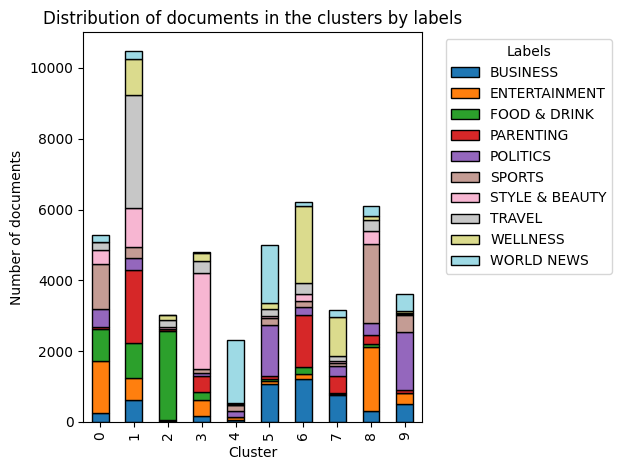

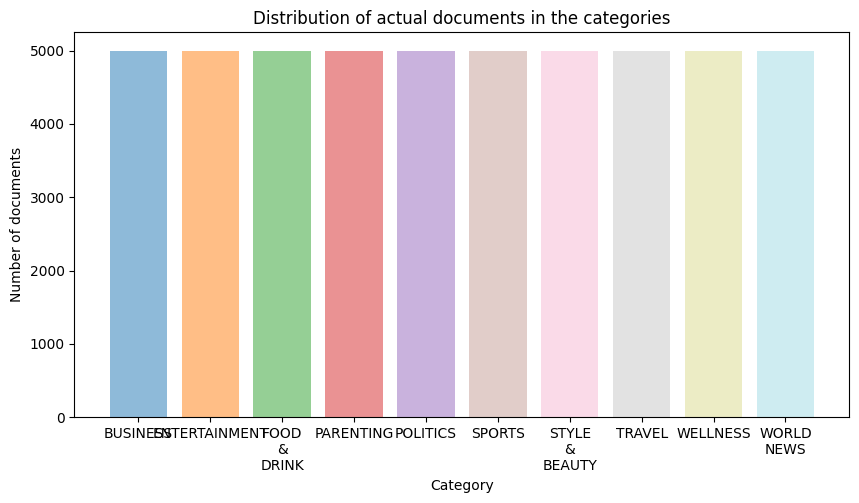


Distribution of documents in the clusters according to labels:
true_label  BUSINESS  ENTERTAINMENT  FOOD & DRINK  PARENTING  POLITICS  \
cluster                                                                  
0                261           1452           920         39       504   
1                626            614           976       2082       331   
2                 36             16          2519         49         9   
3                173            457           203        462        90   
4                 56             75             0         14       163   
5               1080             84            51         91      1430   
6               1205            150           204       1473       215   
7                758             37            34        456       286   
8                310           1801            89        251       332   
9                495            314             4         83      1640   

true_label  SPORTS  STYLE & BEAUTY  TRAVEL  WEL

In [ ]:
x_labels = news_two_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_two_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes_two = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes_two)), category_sizes_two, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes_two)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_bert):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes_two):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_two_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_two_df[news_two_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the BERT vectors of the documents in the current category.
        category_bert = embeddings_two[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_bert)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for WELLNESS: 0.6838631726345269
Average Cosine Similarity for POLITICS: 0.6242071614322865
Average Cosine Similarity for ENTERTAINMENT: 0.5778209641928386
Average Cosine Similarity for TRAVEL: 0.671026525305061
Average Cosine Similarity for STYLE & BEAUTY: 0.6615607521504301
Average Cosine Similarity for PARENTING: 0.6864771354270854
Average Cosine Similarity for FOOD & DRINK: 0.6362384476895379
Average Cosine Similarity for WORLD NEWS: 0.6237640328065613
Average Cosine Similarity for BUSINESS: 0.6499568313662732
Average Cosine Similarity for SPORTS: 0.5595191838367674


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_two_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  # Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_two_df[news_two_df['Category'] == category1].index
    category1_vector = embeddings_two[indices1]

    #Extract the documents in the second category
    indices2 = news_two_df[news_two_df['Category'] == category2].index
    category2_vector = embeddings_two[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between WELLNESS and POLITICS: 0.6167280077934265
Average Cosine Similarity between ENTERTAINMENT and TRAVEL: 0.5960637331008911
Average Cosine Similarity between STYLE & BEAUTY and PARENTING: 0.6480136513710022
Average Cosine Similarity between FOOD & DRINK and WORLD NEWS: 0.5659547448158264
Average Cosine Similarity between BUSINESS and SPORTS: 0.5745791792869568


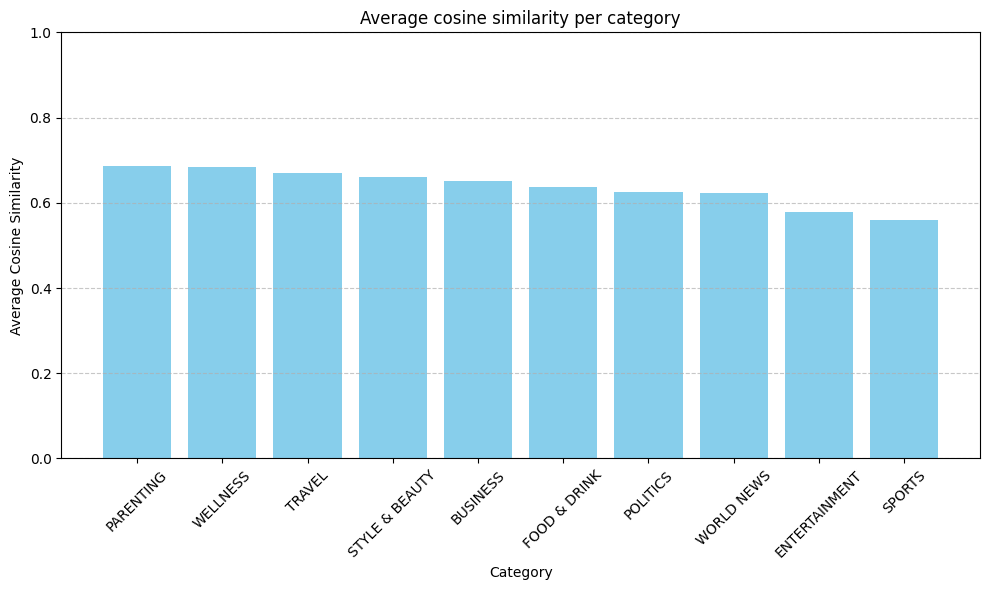

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

#**BERT Embedding With Third Dataset**

## **BERT Last Layer**

In this approach the last layer from BERT is used. This means the model represents the output after going through all layers.

### **Embedding Method**

With this function we get the BERT embedding of a document. The average of the last layer hidden states over all tokens in the input sequence is calculated to obtain a single vector representation of the entire sequence.

In [ ]:
#Function to get the BERT embedding for a given text
def get_bert_embedding(text):
    #Tokenize the input text and return the result as PyTorch tensors
    #Truncate sequences longer than 512 tokens and pad sequences shorter than 512 tokens
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    #Move the inputs to the correct device.
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}
    #Disable gradient calculation since we are only doing inference
    with torch.no_grad():
        #Pass the tokenized input through the BERT model to get the outputs
        outputs = model(**inputs)

    #Compute the mean of the last hidden states across the sequence length dimension and return a single embedding vector for the document
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

This code calculates the BERT embeddings for each text in the 'News' column of the news_df DataFrame and stores the resulting embeddings in a NumPy array called embeddings.



In [ ]:
#Create an empty list to store the embeddings
embeddings_three = []

#Iterate over each text in the 'News' column of the DataFrame and compute its BERT embedding
for text in news_three_df['News']:
    #Call the function 'get_bert_embedding' to get the BERT embedding for the current text
    embedding = get_bert_embedding(text)

    #Append the embedding to the list of embeddings
    embeddings_three.append(embedding)

#Convert the list of embeddings into a NumPy array
embeddings_three = np.array(embeddings_three)

Print the shape of the embeddings. The first number in the tuple represents the number of documents and the second number the hidden dimensions

In [ ]:
print(embeddings_three.shape)

(108774, 768)


BERT embeddings ​​of the first document.

In [ ]:
 #Display the Embeddings of the first document
print(text_data_three[0])
print(embeddings_three[0])


a closer look at water-splitting's solar fuel potential
[ 1.35119185e-01 -3.06138575e-01  4.13258560e-02  3.13713670e-01
 -2.81346202e-01 -1.42110571e-01 -1.07680574e-01  8.30926076e-02
 -7.00561702e-02 -1.79155245e-01  1.53055161e-01 -1.01382114e-01
 -1.13825805e-01  3.65530223e-01 -8.72619823e-02  3.56182307e-01
 -2.17173606e-01  4.04844955e-02  1.86063275e-01 -3.78522184e-03
  4.24836218e-01  1.40592949e-02 -4.52147946e-02  7.57391155e-01
  3.56739104e-01  5.41431978e-02  4.27339748e-02  4.84450966e-01
 -1.31769717e-01  1.56552196e-02  7.42652640e-02  4.63163942e-01
 -3.22974890e-01 -8.48924145e-02  3.84689957e-01 -2.85174012e-01
 -4.52703089e-01 -1.91085592e-01 -1.05410106e-01  2.67356634e-01
 -6.61662936e-01 -3.48582417e-01  4.61026691e-02  4.57520843e-01
 -3.30791771e-01 -7.87910745e-02  7.47001618e-02  1.30685613e-01
 -3.25068146e-01 -4.88984197e-01  9.83048454e-02  5.88566884e-02
 -1.35459185e-01  4.58773524e-02  4.04256172e-02  6.17192566e-01
 -1.89942420e-01 -3.02984446e-01  

Comparison between similar news article

In [ ]:
print("First news article:")
print(text_data_three[9])
print("Second news article:")
print(text_data_three[47])
print("Embedding of first document:")
print(embeddings_three[9])
print("Embedding of second document:")
print(embeddings_three[47])

First news article:
nasa invites engineering students to help harvest water on mars, moon
Second news article:
nasa’s insight lander shows what’s beneath mars’ surface
Embedding of first document:
[ 1.05877079e-01  4.27412927e-01  9.89968404e-02  3.16934735e-01
  5.61820269e-01  1.54776499e-01 -3.87909487e-02  6.96214259e-01
 -2.80623734e-01 -2.66239405e-01  1.77066885e-02 -4.20030564e-01
  3.01358432e-01  1.98927730e-01 -4.17088240e-01  2.72606611e-01
 -6.29095063e-02  1.05824627e-01  6.01766631e-02  3.99127990e-01
  3.14401329e-01 -4.62803654e-02  3.73152822e-01  2.11644709e-01
  3.68635058e-01 -1.49977863e-01 -2.67745405e-01  6.39999807e-01
 -2.08594903e-01 -1.17094249e-01 -3.78358513e-01 -1.59544719e-03
 -1.42147187e-02 -1.45797655e-01 -2.02072993e-01 -1.08958527e-01
 -5.99821843e-02 -1.79276224e-02 -9.84410346e-02  3.41281623e-01
 -3.64594370e-01 -5.00782430e-01 -3.02923694e-02 -1.55490965e-01
 -2.26156205e-01  1.26899570e-01  3.73636872e-01  2.29903623e-01
  3.53635877e-01  5.163

In [ ]:
print("First news article:")
print(text_data_three[22159])
print("Second news article:")
print(text_data_three[22021])
print("Embedding of first document:")
print(embeddings_three[22159])
print("Embedding of second document:")
print(embeddings_three[22021])

First news article:
man utd need extra-time penalty from fernandes to edge past copenhagen
Second news article:
chelsea fc looking to fund £65m move to sign 21-year-old – report
Embedding of first document:
[-4.08643872e-01 -1.98233500e-01  5.13538830e-02 -1.24483176e-01
  5.37011385e-01 -4.15053159e-01  3.44279647e-01 -2.63004631e-01
  1.47874886e-02 -2.32609957e-01  4.69296783e-01 -4.26876813e-01
 -1.03306575e-02  3.02923948e-01 -3.20152193e-01  8.10317695e-02
  4.16254669e-01  1.99093878e-01 -7.03784972e-02 -3.32957268e-01
  3.39855641e-01 -1.82991512e-02 -5.03902398e-02  7.64624551e-02
  9.08854067e-01 -1.47902891e-01 -4.76152837e-01  4.53918248e-01
 -7.63212681e-01  2.49234706e-01  4.88014013e-01 -1.22088395e-01
 -2.58364618e-01 -2.77351528e-01  3.12086605e-02 -2.35426217e-01
  1.09843098e-01 -4.22198445e-01 -2.23982170e-01  2.09334686e-01
 -1.43574789e-01 -2.01591458e-02  1.34864897e-01  7.94392154e-02
  1.66973099e-01 -2.09992275e-01  5.10368645e-01  1.27427876e-01
  2.53541887e

Get the cosine similarity for these embeddings. Cosine similarity measures the cosine of the angle between vectors in a multi-dimensional space, representing their orientation. It ranges from -1 to 1, where 1 indicates that the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposed.

Cosine similarity between sports article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([embeddings_three[22159]], [embeddings_three[22021]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.6410515904426575


Cosine similarity between science article

In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([embeddings_three[9]], [embeddings_three[47]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.7079619765281677


Cosine similarity between sports and science article




In [ ]:
#Cosine Similarity
cos_sim = cosine_similarity([embeddings_three[9]], [embeddings_three[22159]])[0][0]
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.4924899935722351


### **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans_three = KMeans(
    n_clusters=true_k_three,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(embeddings_three)

Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, SVD (Singular Value Decomposition) is used, cause it need less time and computing power.

In [ ]:
#Reducing the dimensions of the embeddings with PCA.
pca = PCA(n_components=2)
embeddings_2d_three = pca.fit_transform(embeddings_three)

In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_bert, cluster_sizes_bert = np.unique(kmeans_three.labels_, return_counts=True)

#Visualize the clusters using the PCA reduced data
plt.figure(figsize=(40, 35))
cluster_labels = kmeans_three.labels_

scatter = plt.scatter(embeddings_2d_three[:, 0], embeddings_2d_three[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k_three):
    plt.text(embeddings_2d_three[cluster_labels == label, 0].mean(), embeddings_2d_three[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d_three[cluster_labels == label, 0].mean(), embeddings_2d_three[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes_three}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_bert}")


Output hidden; open in https://colab.research.google.com to view.

### **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters


In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=1):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels_three, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels_three, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels_three, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels_three, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


Applies the fit_and_evaluate function and visualizes it

clustering done in 187.57 ± 0.00 s 
Homogeneity: 0.349 ± 0.000
Completeness: 0.346 ± 0.000
V-measure: 0.348 ± 0.000
Adjusted Rand-Index: 0.267 ± 0.000
Silhouette Coefficient: 0.038 ± 0.000


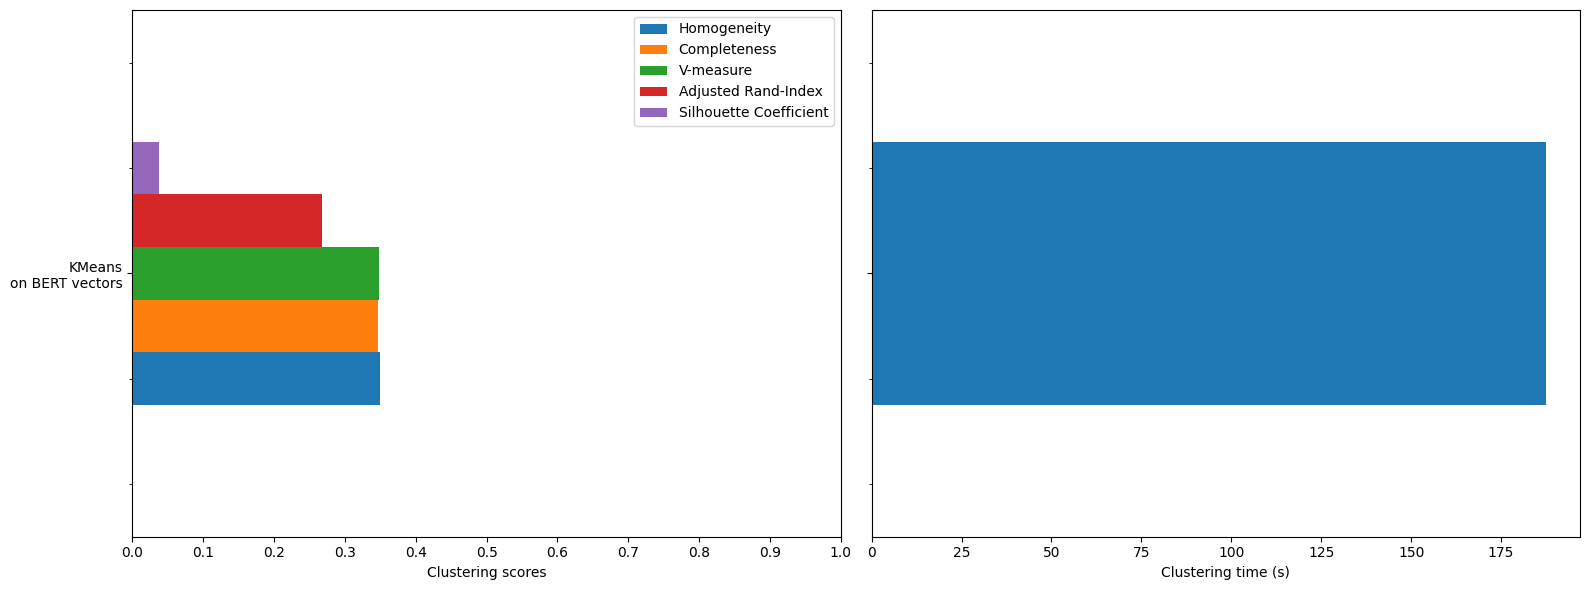

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans_three, embeddings_three, name="KMeans\non BERT vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

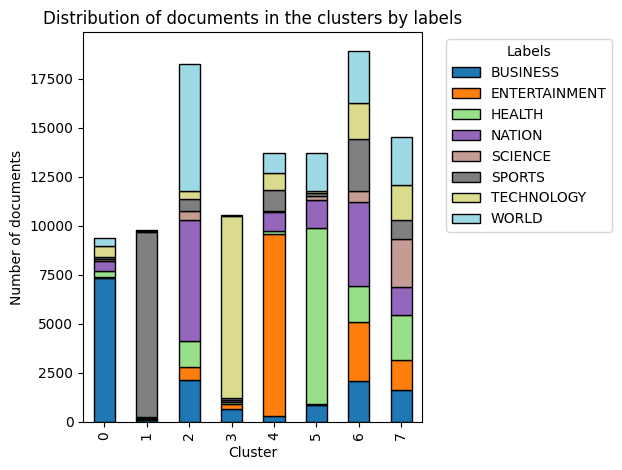

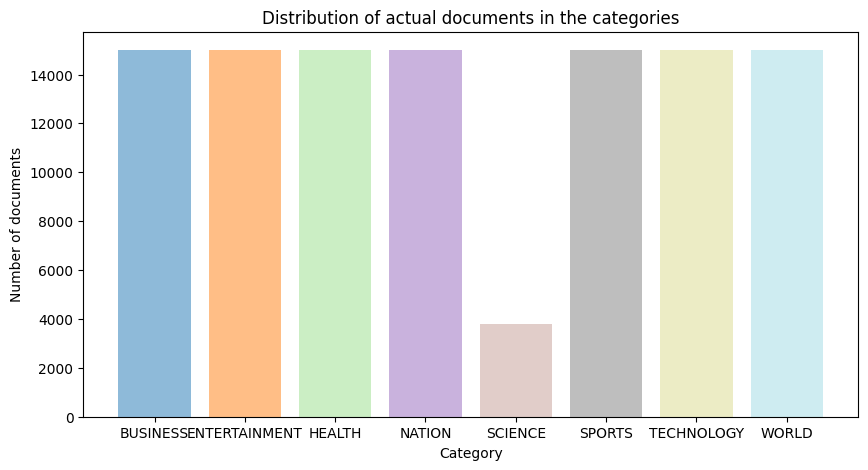


Distribution of documents in the clusters according to labels:
true_label  BUSINESS  ENTERTAINMENT  HEALTH  NATION  SCIENCE  SPORTS  \
cluster                                                                
0               7323             62     314     518       96      67   
1                 76             85      20      56        2    9445   
2               2113            688    1336    6169      424     648   
3                658            248     131      63       28      63   
4                278           9311     116    1000       39    1056   
5                839             90    8933    1464      211     124   
6               2070           3006    1842    4293      552    2639   
7               1643           1510    2308    1437     2422     958   

true_label  TECHNOLOGY  WORLD  
cluster                        
0                  593    402  
1                   67     36  
2                  389   6457  
3                 9299     80  
4                  910 

In [ ]:
x_labels = news_three_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_three_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes_three = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes_three)), category_sizes_three, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes_three)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_bert):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes_three):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_three_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_three_df[news_three_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the BERT vectors of the documents in the current category.
        category_bert = embeddings_three[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_bert)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for SCIENCE: 0.6116922023284568
Average Cosine Similarity for TECHNOLOGY: 0.6161275818387892
Average Cosine Similarity for HEALTH: 0.6392457808298331
Average Cosine Similarity for WORLD: 0.6049862168589017
Average Cosine Similarity for ENTERTAINMENT: 0.6047191768340111
Average Cosine Similarity for SPORTS: 0.5919425383914483
Average Cosine Similarity for BUSINESS: 0.6224452296819788
Average Cosine Similarity for NATION: 0.6017847945418583


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_three_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  #Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_three_df[news_three_df['Category'] == category1].index
    category1_vector = embeddings_three[indices1]

    #Extract the documents in the second category
    indices2 = news_three_df[news_three_df['Category'] == category2].index
    category2_vector = embeddings_three[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between SCIENCE and TECHNOLOGY: 0.557124137878418
Average Cosine Similarity between HEALTH and WORLD: 0.5940088629722595
Average Cosine Similarity between ENTERTAINMENT and SPORTS: 0.5608327388763428
Average Cosine Similarity between BUSINESS and NATION: 0.5849319696426392


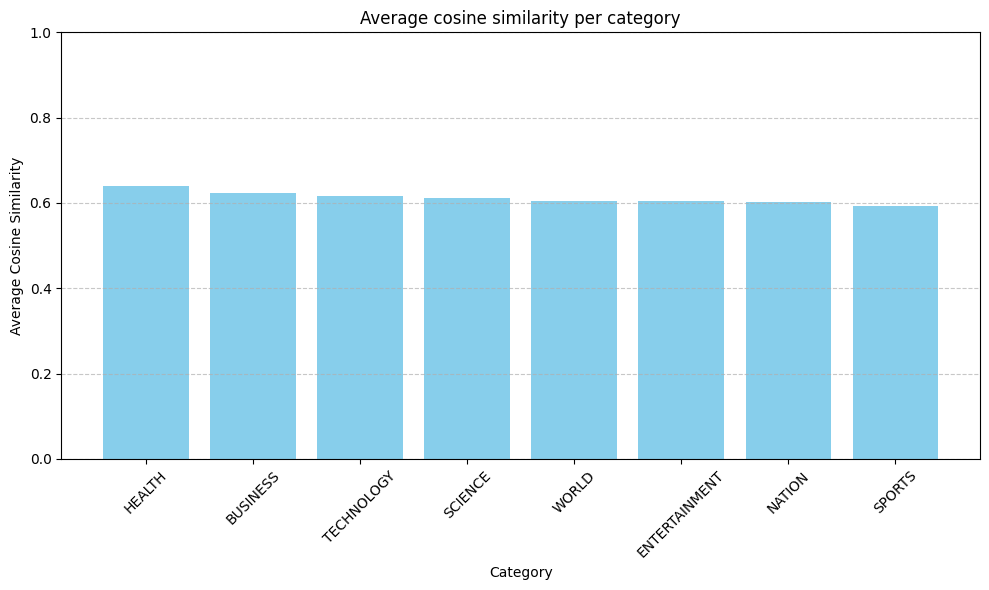

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  #Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

# **Sources**

The datasets,code, different methods and explanations are from these sources:

* https://www.kaggle.com/datasets/rafsunahmad/classify-news-into-category
* https://www.kaggle.com/datasets/setseries/news-category-dataset
* https://www.kaggle.com/datasets/kotartemiy/topic-labeled-news-dataset
* https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py
* https://www.learndatasci.com/glossary/cosine-similarity/
* https://huggingface.co/docs/transformers/model_doc/bert
* https://huggingface.co/google-bert/bert-base-uncased
* ChatGPT to generate code and text
* J. Devlin, M.-W. Chang, K. Lee, and K. Toutanova, “BERT: Pre-training of
deep bidirectional transformers for language understanding,” arXiv preprint
arXiv:1810.04805, 2019. https://arxiv.org/abs/1810.04805.
